<Strong>Overview</Strong>

> This is kaggle competition problem posted by Researchers from the IEEE Computational Intelligence Society (IEEE-CIS) to decrease the false positive rate in detecting online transactions as fraud (A fraud transaction is considered as positive result). The Data is provided by Vesta corporation.

<strong>Understanding as a Machine Learning Problem</strong>
> * Binary Classification problem with interpretability.
> * Need to reduce false positive rate.
> * No Latency is required as its a immediate action for a transaction.
> * AUC score is used for evaluation.

In [0]:
# @title Configuration 

# Data container is google drive.
from google.colab import drive
drive.mount('/content/drive')
data_root_path = 'drive/My Drive/Case study/Fraud-Detection/'
data_path = data_root_path + 'data/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# @title Import statements 
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
import pandas as pd
import numpy as np
from IPython.display import display, HTML
pd.set_option('display.width', 500)
pd.options.display.max_rows
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm
from bs4 import BeautifulSoup
import string
import re
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy import stats
!pip install dexplot

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Data Overview

In [0]:
# @title Overview of train data
train_transaction_df = pd.read_csv(f'{data_path}train_transaction.csv')
test_transaction_df = pd.read_csv(f'{data_path}test_transaction.csv')
train_identity_df = pd.read_csv(f'{data_path}train_identity.csv')
test_identity_df = pd.read_csv(f'{data_path}test_identity.csv')

# Sample Data
print('-'*25 + 'Sample Training Transaction Data' + '-'*25)
display(train_transaction_df.head(2))
print('\n')
print('-'*25 + 'Sample Training Identity Data' + '-'*25)
display(train_identity_df.head(2))
print('\n')
print('-'*25 + 'Sample Test Transaction Data' + '-'*25)
display(test_transaction_df.head(2))
print('\n')
print('-'*25 + 'Sample Test Identity Data' + '-'*25)
display(test_identity_df.head(2))

-------------------------Sample Training Transaction Data-------------------------


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,



-------------------------Sample Training Identity Data-------------------------


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device




-------------------------Sample Test Transaction Data-------------------------


,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,47.950001,0.0,0.0,47.950001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,299.0,87.0,4.0,NaN,aol.com,NaN,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,1.0,1.0,12.0,2.0,149.0,149.0,7.0,634.0,7.0,NaN,NaN,NaN,NaN,231.0,634.0,NaN,NaN,NaN,634.0,T,F,F,M0,NaN,F,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0



-------------------------Sample Test Identity Data-------------------------


,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,100.0,NotFound,27.0,NaN,New,NotFound,225.0,15.0,427.0,563.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,Found,NaN,-300.0,Found,Found,166.0,NaN,542.0,368.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Android 6.0.1,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T


In [0]:
# @title load data
train_df= None
test_df = None
if os.path.exists(f'{data_path}train_df.csv') :
  del train_transaction_df, train_identity_df,test_transaction_df, test_identity_df
  train_df = pd.read_csv(f'{data_path}train_df.csv')
  test_df = pd.read_csv(f'{data_path}test_df.csv')
else :
  # combine transactions and identities. All transactions doesnot have identities.
  train_df = pd.merge(train_transaction_df, train_identity_df, 
                          how='left', on='TransactionID')
  test_df = pd.merge(test_transaction_df, test_identity_df, 
                          how='left', on='TransactionID')
  train_df.to_csv(f'{data_path}train_df.csv', index = False)
  test_df.to_csv(f'{data_path}test_df.csv', index = False)
  del train_transaction_df, train_identity_df,test_transaction_df, test_identity_df

In [0]:
display(train_df.head(5))
display(test_df.head(5))

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,vis

## Exploratory Data Analytics

In [0]:
# @title Utility Fuctions

def showCountForCatDataWithFraudPerc(df, col, title, order) :
  '''
  Function to show plot of Histograms for categories on 
  specified column with Fraud percentages.

  We Create a twinx() - new axes on the sampe plot.
  Draw percentages on new axes left y axis.
  Draw counts on old axes right y axis.
  label the patches of axes with percentages of cat
  draw a pointplot using fraud percentages on this axis. 

  df : DataFrame
  col : column name (Categorical) on which Data to show count plot with fraud percentages.
  title : string containing title for the plot
  order : ordered sequence of categorical column names. 
  '''
  ncount=len(df)
  g1 = sns.countplot(x=col, data=df, order=order)
  gt = g1.twinx()
  cross_tab = pd.crosstab(df[col], df['isFraud'], normalize='index') * 100
  cross_tab = cross_tab.reset_index()
  cross_tab.rename(columns={0:'Not-Fraud', 1:'Fraud'}, inplace=True)
  gt = sns.pointplot(x=col, y='Fraud', data=cross_tab, color='black', order=order, legend=False)
  gt.set_ylabel("% of Fraud Transactions", fontsize=16)
  
  for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x()+p.get_width()/2.,
            height + 25,
            '{:1.2f}%'.format(height/ncount*100),
            ha="center") 
  
  g1.set_title(title)
  return g1

def showCountWithFreq(df, col, title, order):
  '''
  reference : https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies

  Function to show countplot with percentages. 
  We Create a twinx() - new axes.
  Draw percentages on new axes left y axis.
  Draw counts on old axes right y axis.
  label the patches of axes with percentages of categories.

  This method is for Categorical columns.

  df : DataFrame
  col : list of categorical column names.
  title : string containing title for the plot
  order : ordered sequence of categorical column names.
  '''
  ncount = len(df)
  ax = sns.countplot(x = col, data=df, order=order)
  ax2 = ax.twinx()
  ax2.yaxis.tick_left()
  ax.yaxis.tick_right()
  ax.yaxis.set_label_position('right')
  ax2.yaxis.set_label_position('left')
  ax2.set_ylabel('Frequency [%]')
  for p in ax.patches:
      x=p.get_bbox().get_points()[:,0]
      y=p.get_bbox().get_points()[1,1]
      ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
              ha='center', va='bottom') # set the alignment of the text

  # Use a LinearLocator to ensure the correct number of ticks
  ax.yaxis.set_major_locator(ticker.LinearLocator(11))

  # Fix the frequency range to 0-100
  ax2.set_ylim(0,100)
  ax.set_ylim(0,ncount)

  # And use a MultipleLocator to ensure a tick spacing of 10
  ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

  # Need to turn the grid on ax2 off, otherwise the gridlines end up on top of the bars
  ax2.grid(None)
  plt.title(title)
  return ax

def resumetable(df):
    '''
    reference : https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt

    Function to extract useful statistics and Summarize the DataFrame along column axis.

    'Name' - name of the feature
    dtype - datatype of the feature.
    missing - no of missing values in the feature.
    uniques - no of unique values in the feature.
    first value - first row value of the feature.
    second value - second row value of the feature.
    third value - thired row value of the feature.

    df : DataFrame with required columns/features.
    '''
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name','dtypes']]
    summary['Missing'] = df.isnull().sum().values    
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2),2) 

    return summary




In [0]:
# @title Missing Data
print('No. of Rows, Columns in train data', train_df.shape)
print('No. of Rows, Columns in test data', test_df.shape)
print('No. of Columns having missing values in train data is - ', (train_df.isnull().any().sum()))
print('No. of Columns having missing values in test data is - ', (test_df.isnull().any().sum()))

No. of Rows, Columns in train data (590540, 434)
No. of Rows, Columns in test data (506691, 433)
No. of Columns having missing values in train data is -  414
No. of Columns having missing values in test data is -  385


### Univariate Analysis

#### Transactions

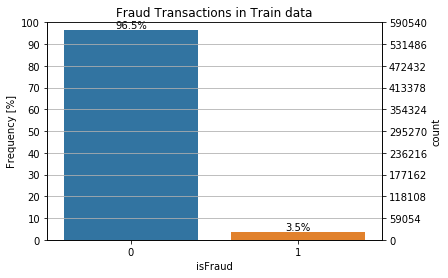

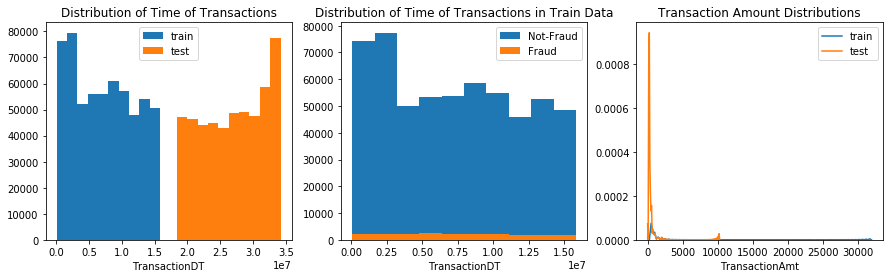

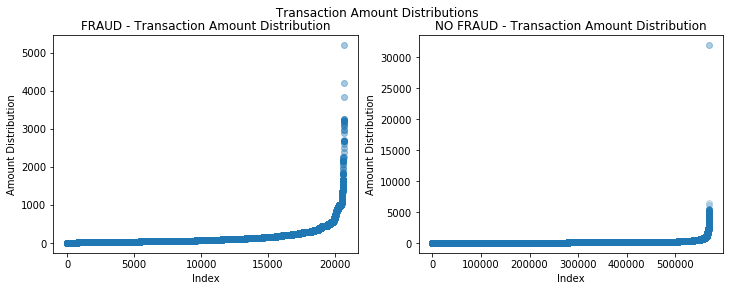

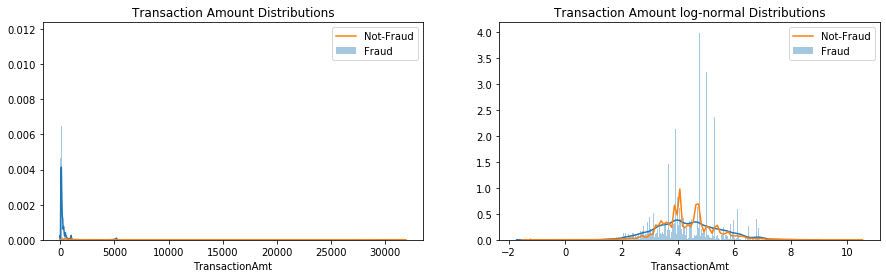

Statistics for Fraud Transaction Amounts : 
 DescribeResult(nobs=20663, minmax=(-1.2310014767138553, 8.55468163582723), mean=4.3506182278905365, variance=1.280233496571137, skewness=0.08096165346020716, kurtosis=0.1996394840608131)
Statistics for Not-Fraud Transaction Amounts : 
 DescribeResult(nobs=569877, minmax=(-1.3823023398503531, 10.371532734024385), mean=4.364344098779273, variance=0.8967645763193112, skewness=0.43480181151066355, kurtosis=0.9873797683553596)
Fraud TransactionAmount values Quantiles : 
 0.10      18.936
0.25      35.044
0.50      75.000
0.75     161.000
0.90     335.000
0.99     994.000
1.00    5191.000
Name: TransactionAmt, dtype: float64
Not-Fraud TransactionAmount values Quantiles : 
 0.10       26.310
0.25       43.970
0.50       68.500
0.75      120.000
0.90      267.112
0.99     1104.000
1.00    31937.391
Name: TransactionAmt, dtype: float64


In [0]:
# @title Transactions and Transaction Amount Analysis
import matplotlib.ticker as ticker

# show count frequency on fraud/not-fraud data.
ax = showCountWithFreq(train_df, 'isFraud', 'Fraud Transactions in Train data', None)
plt.show()
plt.close()
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)

# Show Distribution of Time of Transactions :
plt.title('Distribution of Time of Transactions')
plt.hist(train_df['TransactionDT'], label='train')
plt.hist(test_df['TransactionDT'], label='test')
plt.xlabel('TransactionDT')
plt.legend()
# Show Distribution of Time of Transactions :
plt.subplot(1,3,2)
plt.title('Distribution of Time of Transactions in Train Data')
plt.hist(train_df.loc[train_df['isFraud'] == 0]['TransactionDT'], label='Not-Fraud')
plt.hist(train_df.loc[train_df['isFraud'] == 1]['TransactionDT'], label='Fraud')
plt.xlabel('TransactionDT')
plt.legend()
plt.subplot(1,3,3)
ax = sns.distplot(train_df['TransactionAmt'], kde=True, hist=False, label='train')
ax = sns.distplot(test_df['TransactionAmt'], kde=True, hist=False, label='test')
plt.title("Transaction Amount Distributions")
plt.show()
plt.close()

# Distribution on FRAUD - Transaction
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
g = plt.scatter(range(train_df[train_df['isFraud'] == 1].shape[0]), 
                 np.sort(train_df[train_df['isFraud'] == 1]['TransactionAmt'].values), 
                label='isFraud', alpha=.4)
plt.title("FRAUD - Transaction Amount Distribution")
plt.xlabel("Index")
plt.ylabel("Amount Distribution")

plt.subplot(1,2,2)
g1 = plt.scatter(range(train_df[train_df['isFraud'] == 0].shape[0]),
                 np.sort(train_df[train_df['isFraud'] == 0]['TransactionAmt'].values), 
                 label='NoFraud', alpha=.2)
g1= plt.title("NO FRAUD - Transaction Amount Distribution")
g1 = plt.xlabel("Index")
g1 = plt.ylabel("Amount Distribution")

plt.suptitle(' Transaction Amount Distributions ')

plt.show()
plt.close()

plt.figure(figsize=(15, 4))
plt.subplot(1,2,1)
ax = sns.distplot(train_df.loc[train_df['isFraud'] == 1]['TransactionAmt'], kde=True, hist=True, label='Fraud', bins=1113)
ax = sns.distplot(train_df.loc[train_df['isFraud'] == 0]['TransactionAmt'], kde=True, hist=False, label='Not-Fraud', bins=1113)
plt.title("Transaction Amount Distributions")
plt.subplot(1,2,2)
ax = sns.distplot(np.log(train_df.loc[train_df['isFraud'] == 1]['TransactionAmt']), kde=True, hist=True, label='Fraud', bins=1113)
ax = sns.distplot(np.log(train_df.loc[train_df['isFraud'] == 0]['TransactionAmt']), kde=True, hist=False, label='Not-Fraud', bins=1113)
plt.title("Transaction Amount log-normal Distributions")
plt.show()
plt.close()

print('Statistics for Fraud Transaction Amounts : \n', stats.describe(np.log(train_df.loc[train_df['isFraud'] == 1]['TransactionAmt'])))
print('Statistics for Not-Fraud Transaction Amounts : \n', stats.describe(np.log(train_df.loc[train_df['isFraud'] == 0]['TransactionAmt'])))

print('Fraud TransactionAmount values Quantiles : \n', train_df.loc[train_df['isFraud'] == 1]['TransactionAmt'].quantile([0.10, 0.25, 0.50, 0.75, 0.90, 0.99, 1.0]))
print('Not-Fraud TransactionAmount values Quantiles : \n', train_df.loc[train_df['isFraud'] == 0]['TransactionAmt'].quantile([0.10, 0.25, 0.50, 0.75, 0.90, 0.99, 1.0]))

<Strong>Observation</Strong>
* Only 3.5% of overall transactions are fraud.
* Both Train and Test TransactionAmounts follow power law distributions.
* recent transactions are given in test data
* recent transactions amounts are lower than old transaction amounts.
* Fraud Transaction Amounts are highly concentrated in 25 - 1104.
* Transaction time is of no effect to get insight of fraud transactions.

#### ProductCD

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,ProductCD,object,0,5,W,W,W,1.28


Train data Unique values in ProductCD are :  ['W', 'H', 'C', 'S', 'R']
Test data Unique values in ProductCD are :  ['W', 'C', 'S', 'H', 'R']


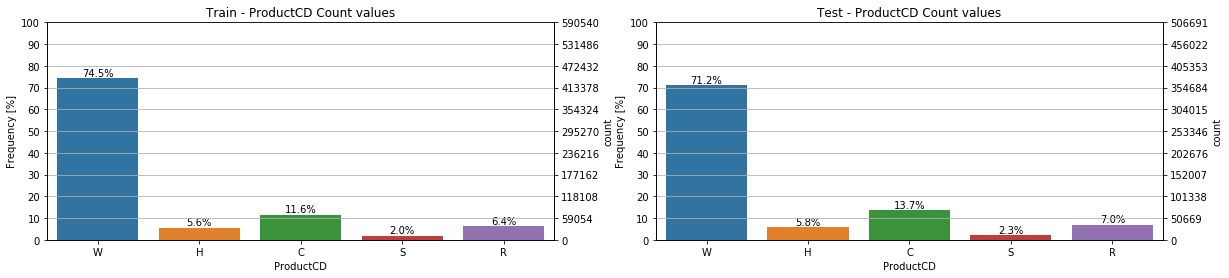

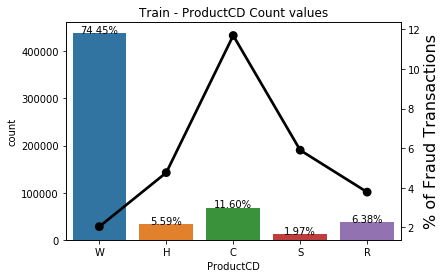

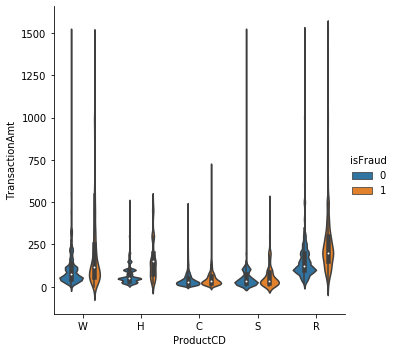

In [0]:
# @title ProductCD Analysis
display(resumetable(train_df[['ProductCD']]))

# unique values in productCD feature
productCD_unique_list_train = list(train_df['ProductCD'].unique())
productCD_unique_list_test = list(test_df['ProductCD'].unique())

print('Train data Unique values in ProductCD are : ', productCD_unique_list_train)
print('Test data Unique values in ProductCD are : ', productCD_unique_list_test)

# Count plots on productCD feature
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
ax = showCountWithFreq(train_df, 'ProductCD', 'Train - ProductCD Count values', order = productCD_unique_list_train)
plt.subplot(1,2,2)
ax = showCountWithFreq(test_df, 'ProductCD', 'Test - ProductCD Count values', order = productCD_unique_list_train)
plt.show()
plt.close()
ax = showCountForCatDataWithFraudPerc(train_df, 'ProductCD', 'Train - ProductCD Count values', order = productCD_unique_list_train)
plt.show()
plt.close()

sns.catplot(x='ProductCD', y='TransactionAmt', hue="isFraud", data=train_df.loc[train_df['TransactionAmt'] <= 1500], kind='violin')
plt.show()
plt.close()

<Strong>Observation</Strong>
* Train and Test have same distributions
* In Train data, C, S, H having higher fraud transactions.
* W contributes higher distribution but having least fraud transactions in percentage.

#### Card Features 

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,card1,int64,0,13553,13926,2755,4663,9.97
1,card2,float64,8933,500,NaN,404,490,6.32
2,card3,float64,1565,114,150,150,150,0.68
3,card4,object,1577,4,discover,mastercard,visa,1.09
4,card5,float64,4259,119,142,102,166,2.66
5,card6,object,1571,4,credit,credit,debit,0.82


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


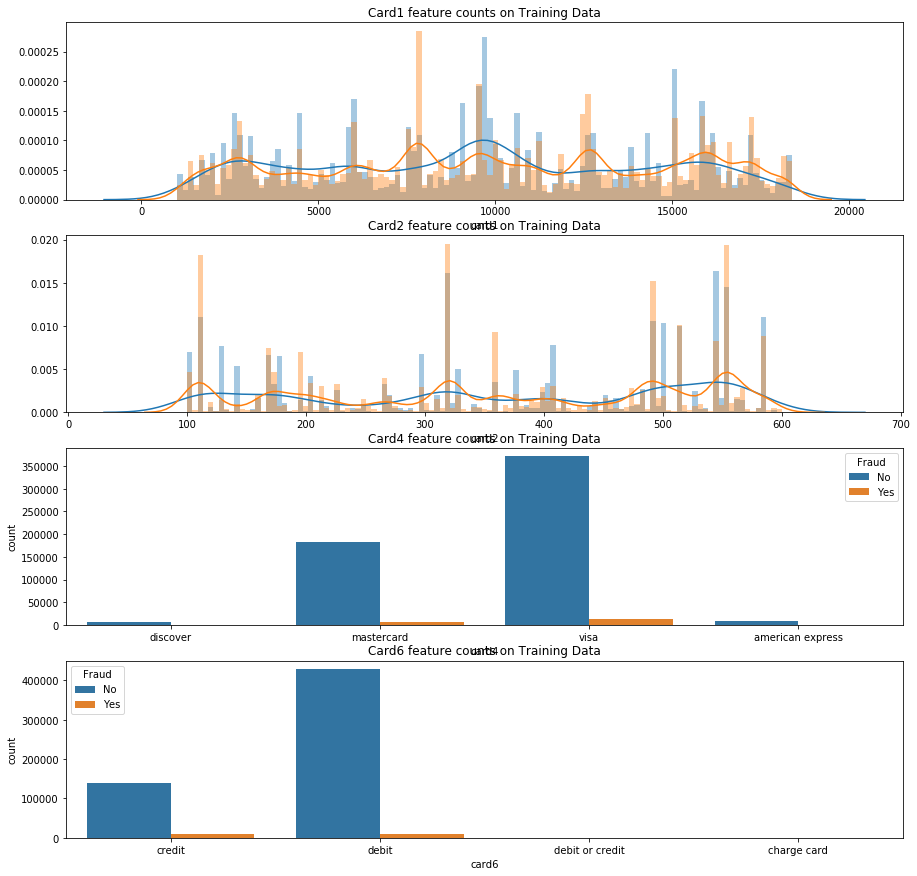

In [0]:
# @title Card Features Analysis-1
display(resumetable(train_df[['card1', 'card2', 'card3', 'card4', 'card5', 'card6']]))

# Count plots on Card features.
# For Card1, Card2 features we show distributionplots.
plt.figure(figsize=( 15,15))
plt.subplot(4, 1,1)
sns.distplot(train_df.loc[train_df['isFraud']==1]['card1'], label='Fraud', bins=113)
sns.distplot(train_df.loc[train_df['isFraud']==0]['card1'], label='Not-Fraud', bins=113)
plt.title('Card1 feature counts on Training Data')
plt.subplot(4, 1,2)
sns.distplot(train_df.loc[train_df['isFraud']==1]['card2'], label='Fraud', bins=113)
sns.distplot(train_df.loc[train_df['isFraud']==0]['card2'], label='Not-Fraud', bins=113)
plt.title('Card2 feature counts on Training Data')
plt.subplot(4, 1,3)
sns.countplot(x='card4', hue='isFraud', data=train_df)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
plt.title('Card4 feature counts on Training Data')
plt.subplot(4, 1,4)
sns.countplot(x='card6', hue='isFraud', data=train_df)
plt.legend(title='Fraud', loc='best', labels=['No', 'Yes'])
plt.title('Card6 feature counts on Training Data')
plt.show()
plt.close()

In [0]:
print(train_df[['card3', 'card5']].quantile([0.10, 0.25, 0.50, 0.75, 0.99, 1.0]))

      card3  card5
0.10  150.0  126.0
0.25  150.0  166.0
0.50  150.0  226.0
0.75  150.0  226.0
0.99  185.0  226.0
1.00  231.0  237.0


posx and posy should be finite values
posx and posy should be finite values


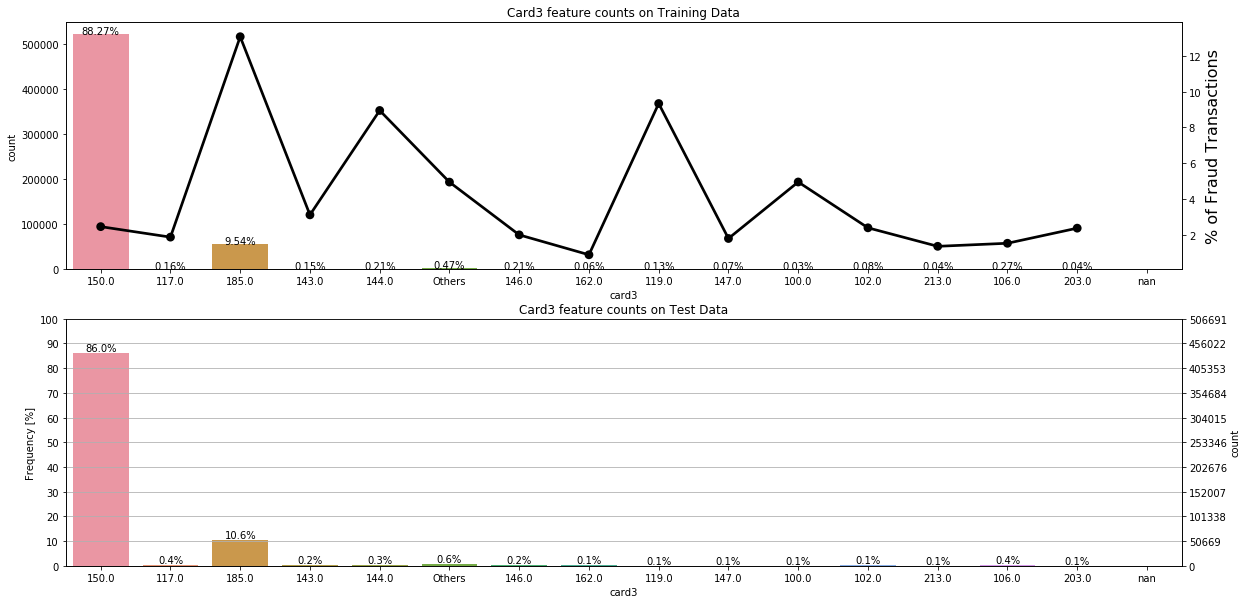

posx and posy should be finite values
posx and posy should be finite values


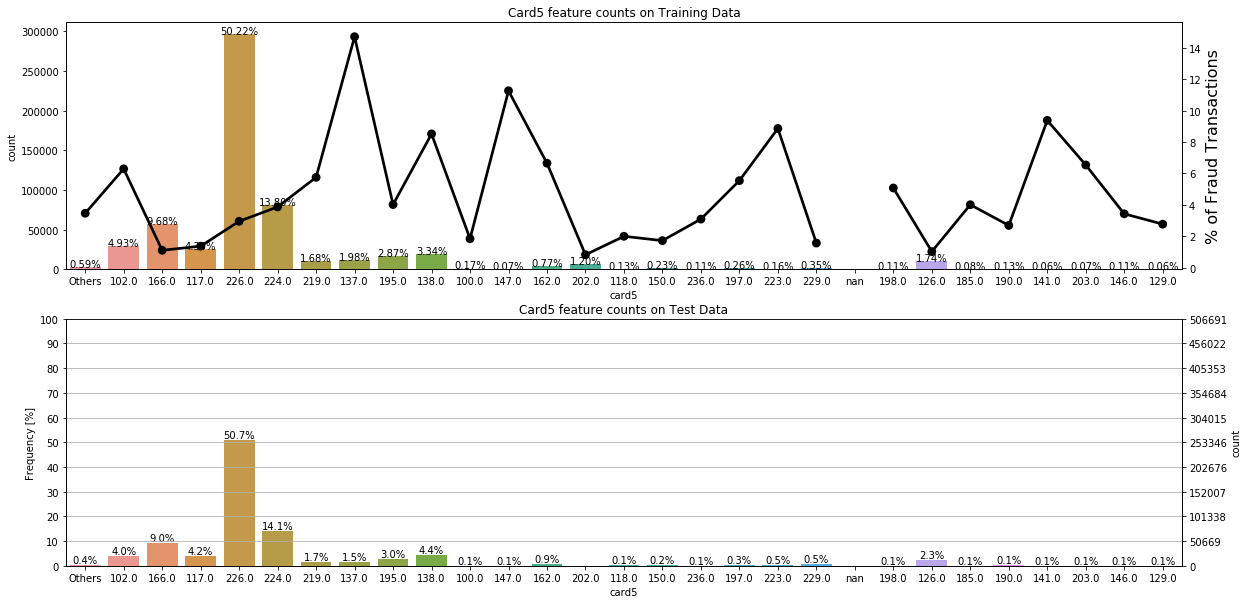

In [0]:
# @title Card Features Analysis-2

train_df.loc[train_df.card3.isin(train_df.card3.value_counts()[train_df.card3.value_counts() < 200].index), 'card3'] = "Others"
train_df.loc[train_df.card5.isin(train_df.card5.value_counts()[train_df.card5.value_counts() < 300].index), 'card5'] = "Others"
test_df.loc[test_df.card3.isin(test_df.card3.value_counts()[test_df.card3.value_counts() < 200].index), 'card3'] = "Others"
test_df.loc[test_df.card5.isin(test_df.card5.value_counts()[test_df.card5.value_counts() < 300].index), 'card5'] = "Others"

card3_unique_train=list(train_df['card3'].unique())
card5_unique_train=list(train_df['card5'].unique())
plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
ax = showCountForCatDataWithFraudPerc(train_df, 'card3', 'Card3 feature counts on Training Data', card3_unique_train)
plt.subplot(2, 1,  2)
ax = showCountWithFreq(test_df, 'card3', 'Card3 feature counts on Test Data', card3_unique_train)
plt.show()
plt.close()

plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
ax = showCountForCatDataWithFraudPerc(train_df, 'card5', 'Card5 feature counts on Training Data', card5_unique_train)
plt.subplot(2, 1, 2)
ax = showCountWithFreq(test_df, 'card5', 'Card5 feature counts on Test Data', card5_unique_train)
plt.show()
plt.close()

<Strong>Observation</Strong>
* card1, card2 distributions are similar for fraud/not-fraud transactions.
* card4 is the card manufacturer details. master card and visa are major distributions.
* card6 is the card type. credit and debit card are major distributions.

* card3 - 150 and 185 are major distributions. 185, 119, 144 contributes (12, 9, 8) % fraud transactions.
* card5 - 336, 224, 117, 166, 138, 126 are major distributions. 137, 147 contributes (15, 10) % fraud transactions.

#### M1-M9 Features

In [0]:
# @title M-Features Info
m_features = ['M1','M2', 'M3','M4','M5', 'M6','M7','M8', 'M9']
display(resumetable(train_df[m_features]))
display(resumetable(test_df[m_features]))

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,M1,object,271100,2,T,NaN,T,0.00
1,M2,object,271100,2,T,NaN,T,0.49
2,M3,object,271100,2,T,NaN,T,0.75
3,M4,object,281444,3,M2,M0,M0,1.31
4,M5,object,350482,2,F,T,F,0.99
5,M6,object,169360,2,T,T,F,1.00
6,M7,object,346265,2,NaN,NaN,F,0.57
7,M8,object,346252,2,NaN,NaN,F,0.95
8,M9,object,346252,2,NaN,NaN,F,0.63


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,M1,object,176639,2,T,T,T,0.00
1,M2,object,176639,2,T,F,T,0.41
2,M3,object,176639,2,F,F,F,0.71
3,M4,object,237745,3,NaN,M0,M0,1.36
4,M5,object,309632,2,NaN,NaN,F,0.99
5,M6,object,158939,2,F,F,F,0.99
6,M7,object,235018,2,T,NaN,F,0.59
7,M8,object,235004,2,T,NaN,F,0.96
8,M9,object,235004,2,T,NaN,F,0.56


In [0]:
# fill NaN values as 'Missing' string
MISSING = 'missing'
for f in m_features:
  train_df[f].fillna(MISSING, inplace=True)
  test_df[f].fillna(MISSING, inplace=True)


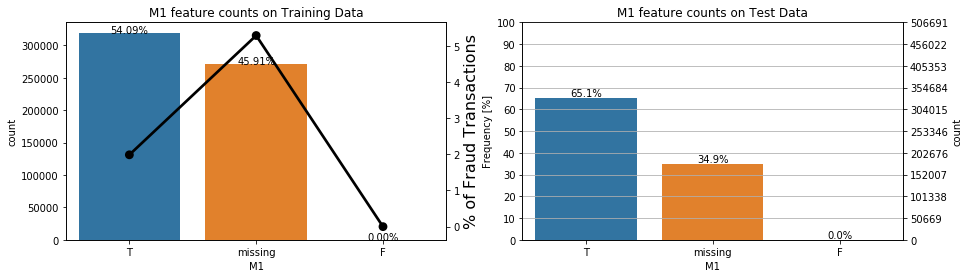

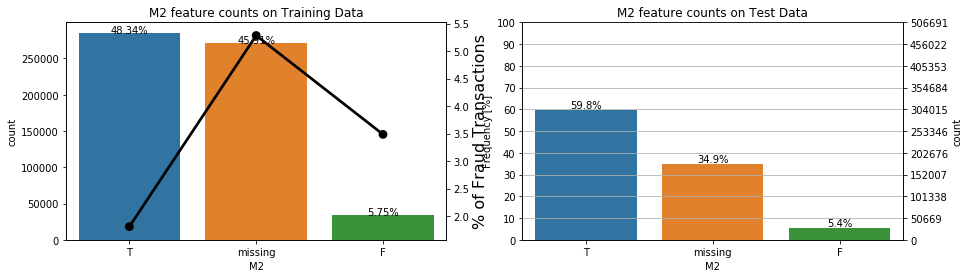

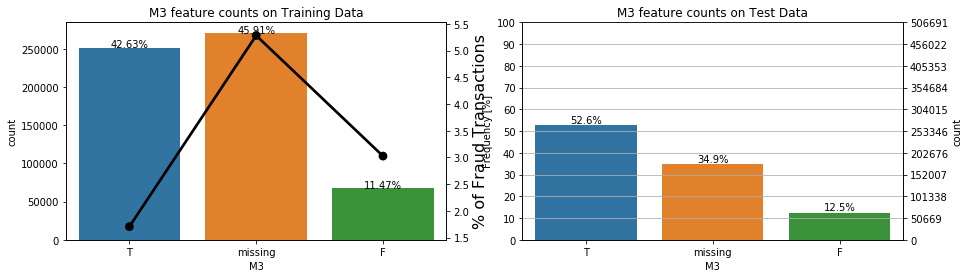

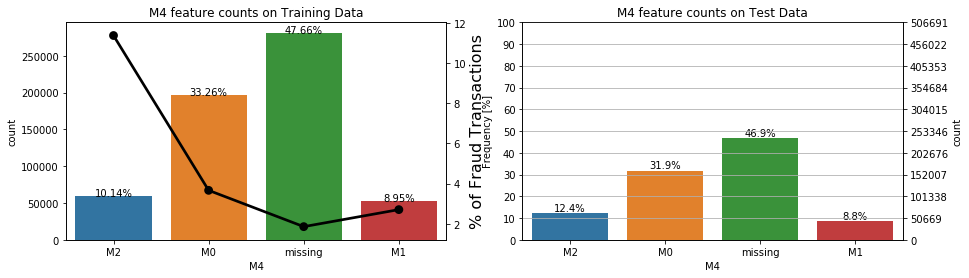

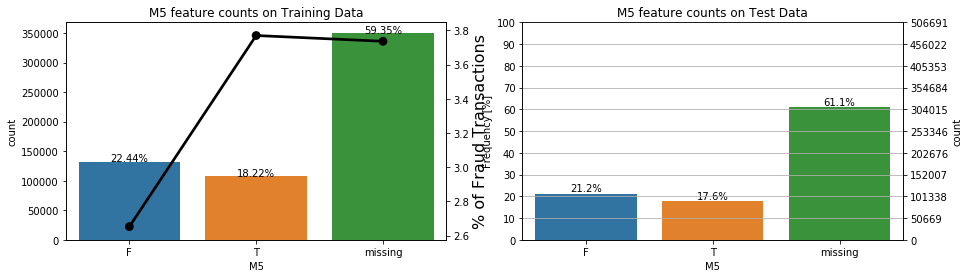

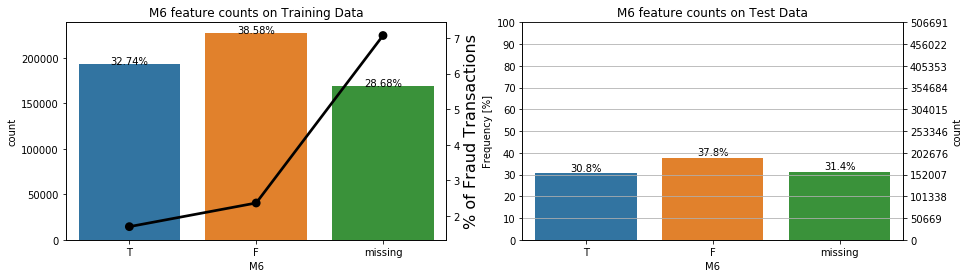

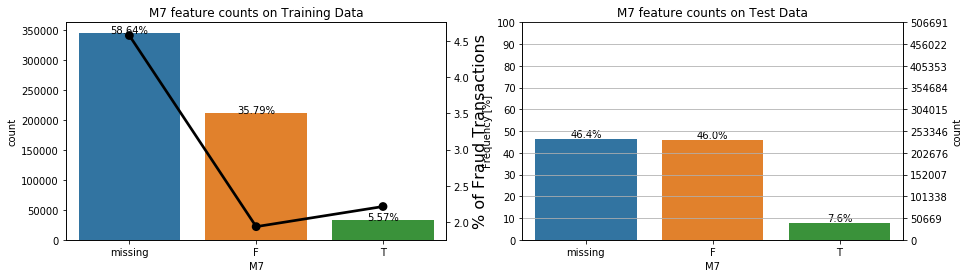

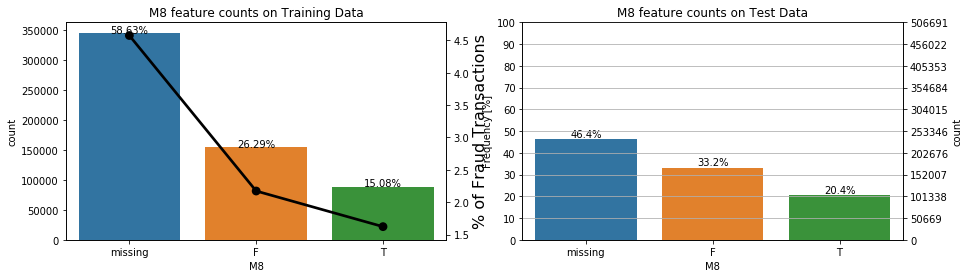

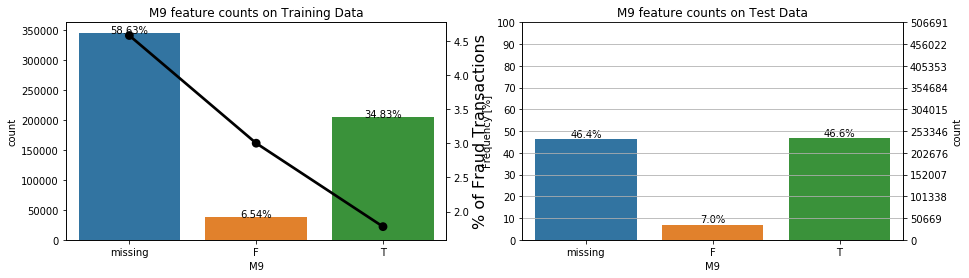

In [0]:
# @title M-Features Analysis

# Count plots on M-Features
for col in m_features:
  plt.figure(figsize=(15, 4))
  plt.subplot(1,2,1)
  ax = showCountForCatDataWithFraudPerc(train_df, col, col+' feature counts on Training Data',list(train_df[col].unique()))
  plt.subplot(1,2,2)
  ax = showCountWithFreq(test_df, col, col+' feature counts on Test Data', list(train_df[col].unique()))
  plt.show()

<strong>Observation</strong>
* In M4 feature, M2 value has more fraud transaction percentage while other having for missing value. 

#### Address

In [0]:
# @title Address Features Analysis

# the categories(values) having low frequency are grouped as others category.
train_df.loc[train_df.addr1.isin(train_df.addr1.value_counts()[train_df.addr1.value_counts() <= 5000 ].index), 'addr1'] = "Others"
train_df.loc[train_df.addr2.isin(train_df.addr2.value_counts()[train_df.addr2.value_counts() <= 50 ].index), 'addr2'] = "Others"
test_df.loc[test_df.addr1.isin(test_df.addr1.value_counts()[test_df.addr1.value_counts() <= 5000 ].index), 'addr1'] = "Others"
test_df.loc[test_df.addr2.isin(test_df.addr2.value_counts()[test_df.addr2.value_counts() <= 50 ].index), 'addr2'] = "Others"

for col in ['addr1', 'addr2'] :
  plt.figure(figsize=(20, 8))
  plt.subplot(2,1,1)
  ax = showCountForCatDataWithFraudPerc(train_df, col, col+' feature counts on Training Data',list(train_df[col].unique()))
  plt.subplot(2,1,2)
  ax = showCountWithFreq(test_df, col, col+' feature counts on Test Data', list(train_df[col].unique()))
  plt.show()

NameError: ignored

posx and posy should be finite values
posx and posy should be finite values


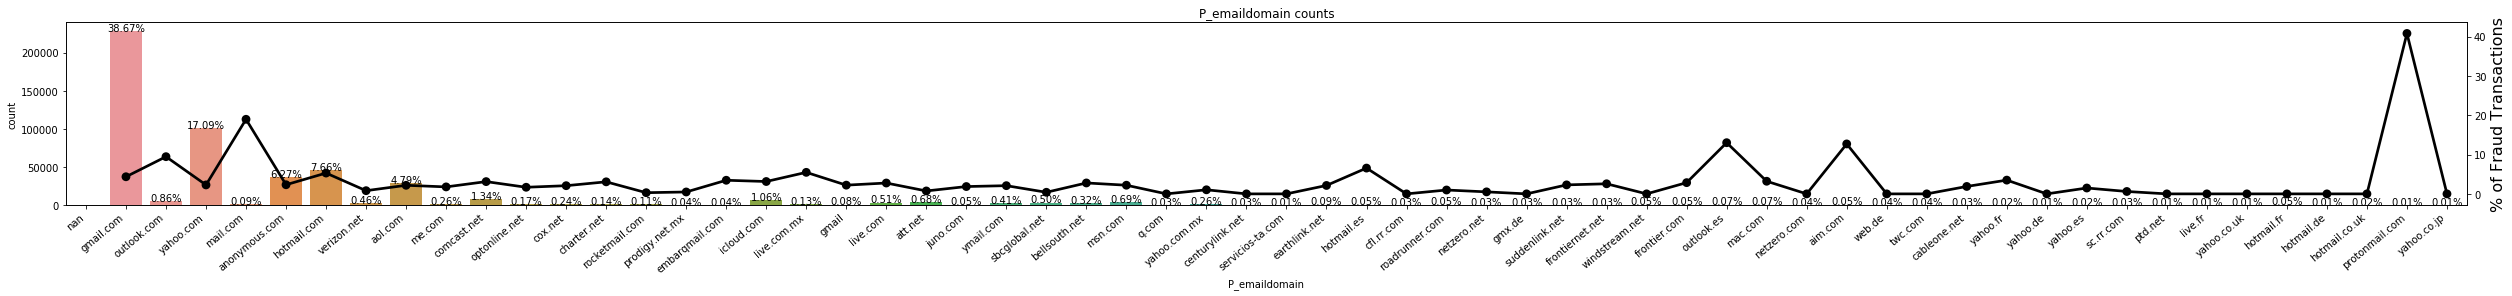

posx and posy should be finite values
posx and posy should be finite values


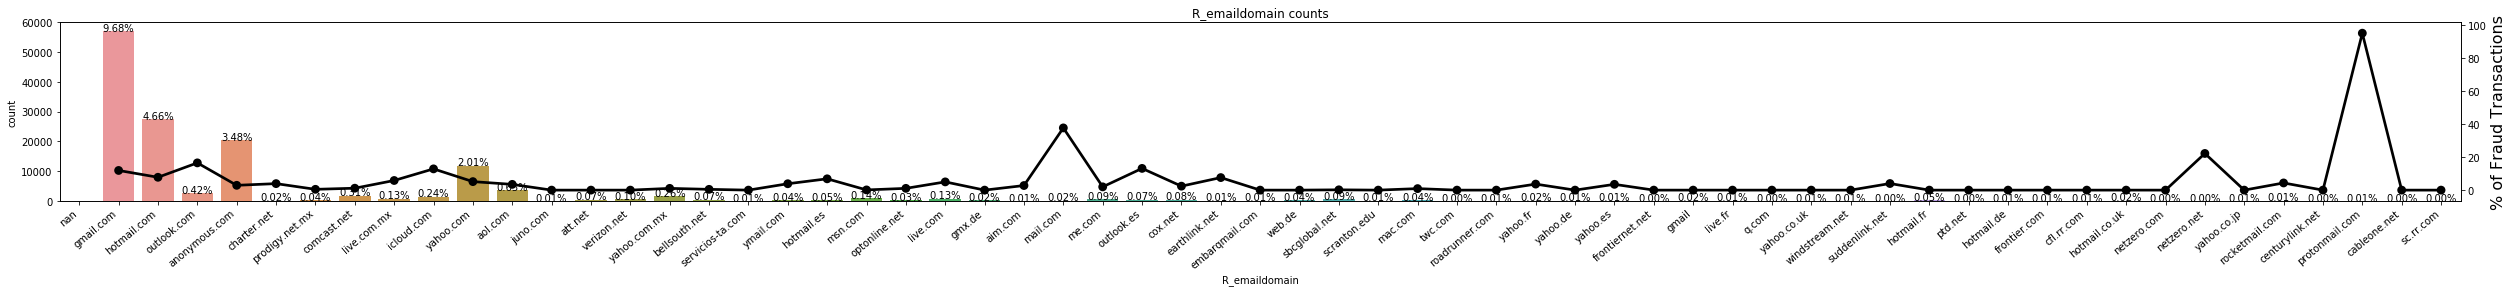

In [0]:
# @title Email Features Analysis
plt.figure(figsize=(35, 4))
ax = showCountForCatDataWithFraudPerc(train_df, 'P_emaildomain', '', list(train_df['P_emaildomain'].unique()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('P_emaildomain counts')
plt.show()
plt.close()
plt.figure(figsize=(35, 4))
ax = showCountForCatDataWithFraudPerc(train_df, 'R_emaildomain', '', list(train_df['R_emaildomain'].unique()))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.title('R_emaildomain counts')
plt.show()
plt.close()

#### Identity Features

In [0]:
# @title Identity Features Info
display(train_df[['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18',
       'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']].describe(include='all'))

display(
    resumetable(
        train_df[['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25',\
       'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',\
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']]))

,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38
count,144233,127320.000000,80044.000000,140985,129340,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,5169,4747.000000,5132.000000,5163.000000,5169,140978,140978,77565,140282,77586.000000,73289,77805,140985,140985,140985,140985
unique,2,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,2,2,2,75,130,NaN,260,4,2,2,2,2
top,NotFound,NaN,NaN,Found,Found,NaN,NaN,NaN,NaN,NaN,NaN,IP_PROXY:TRANSPARENT,NaN,NaN,NaN,Found,Found,Found,Windows 10,chrome 63.0,NaN,1920x1080,match_status:2,T,F,T,F
freq,123025,NaN,NaN,67728,66324,NaN,NaN,NaN,NaN,NaN,NaN,3489,NaN,NaN,NaN,5155,76232,74926,21155,22000,NaN,16874,60011,77814,134066,110452,73922
mean,NaN,48.053071,-344.507146,NaN,NaN,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,NaN,12.800927,329.608924,149.070308,NaN,NaN,NaN,NaN,NaN,26.508597,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,11.774858,93.695502,NaN,NaN,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,NaN,2.372447,97.461089,32.101995,NaN,NaN,NaN,NaN,NaN,3.737502,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,10.000000,-660.000000,NaN,NaN,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,NaN,11.000000,100.000000,100.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,49.000000,-360.000000,NaN,NaN,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,NaN,11.000000,321.000000,119.000000,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,52.000000,-300.000000,NaN,NaN,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,NaN,11.000000,321.000000,149.000000,NaN,NaN,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,52.000000,-300.000000,NaN,NaN,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,NaN,15.000000,371.000000,169.000000,NaN,NaN,NaN,NaN,NaN,32.000000,NaN,NaN,NaN,NaN,NaN,NaN


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id_12,object,446307,2,NaN,NaN,NaN,0.60
1,id_13,float64,463220,54,NaN,NaN,NaN,2.57
2,id_14,float64,510496,25,NaN,NaN,NaN,1.80
3,id_15,object,449555,3,NaN,NaN,NaN,1.33
4,id_16,object,461200,2,NaN,NaN,NaN,1.00
5,id_17,float64,451171,104,NaN,NaN,NaN,1.27
6,id_18,float64,545427,18,NaN,NaN,NaN,1.57
7,id_19,float64,451222,522,NaN,NaN,NaN,5.42
8,id_20,float64,451279,394,NaN,NaN,NaN,5.32
9,id_21,float64,585381,490,NaN,NaN,NaN,4.63


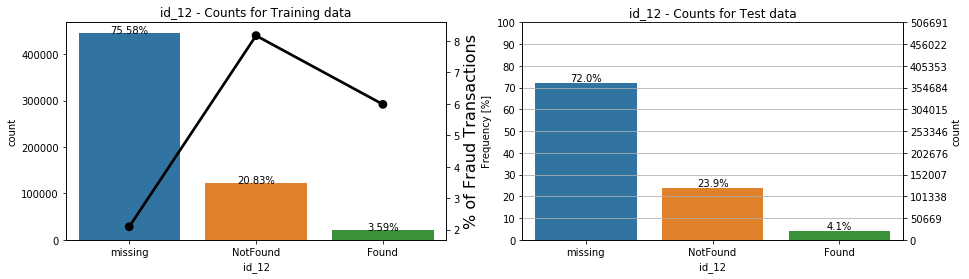

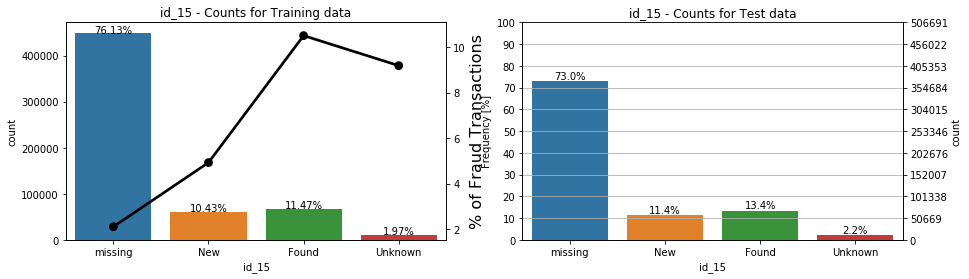

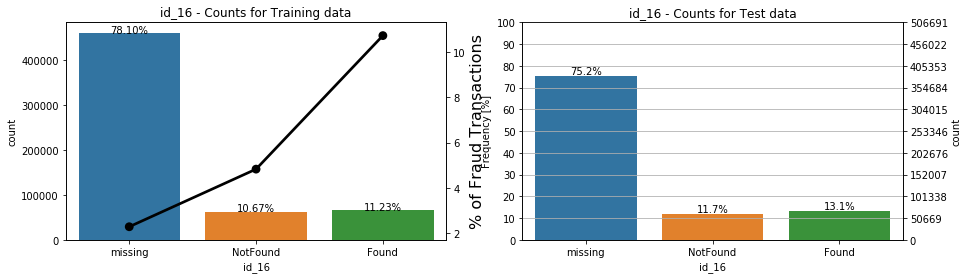

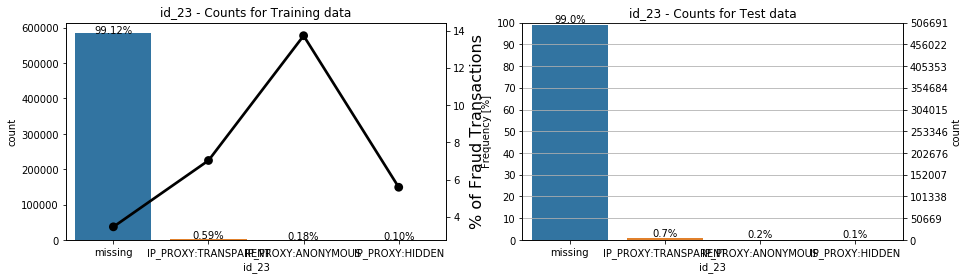

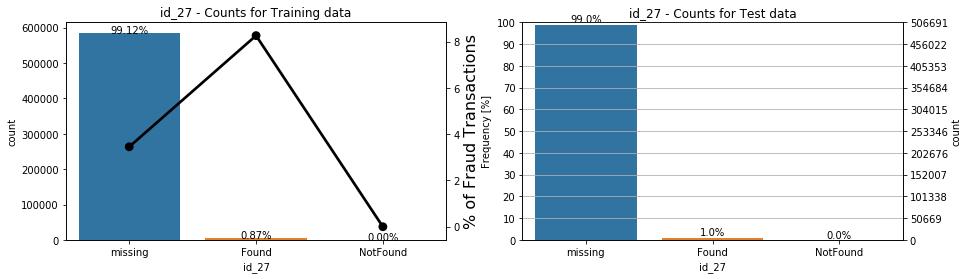

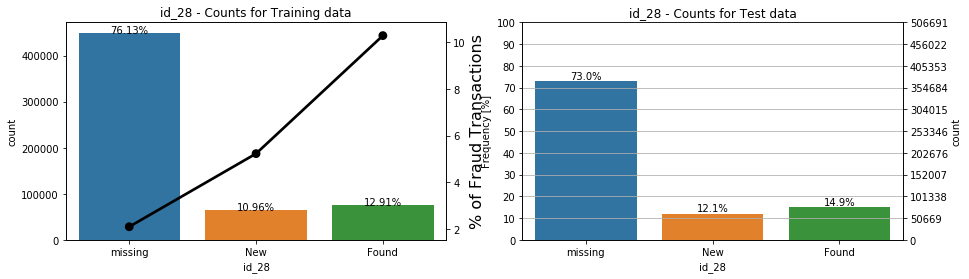

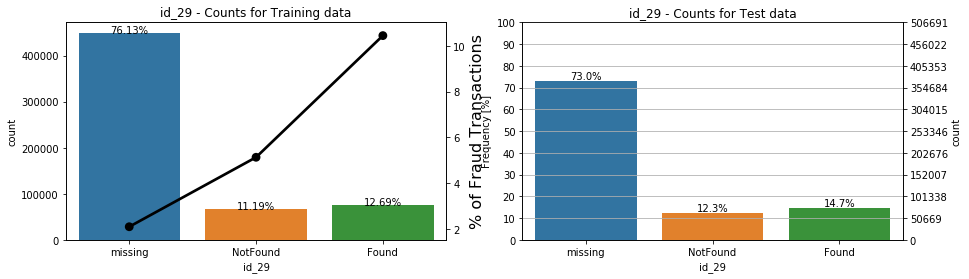

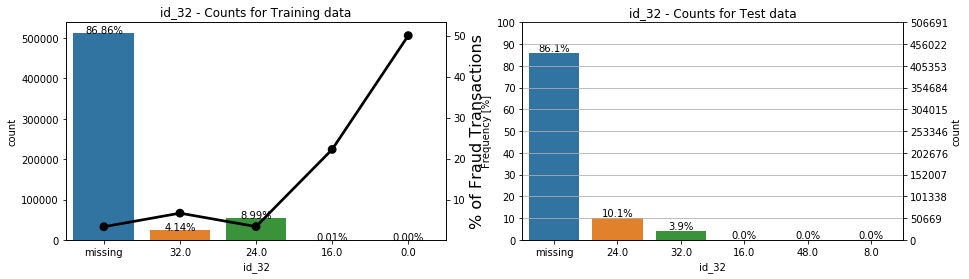

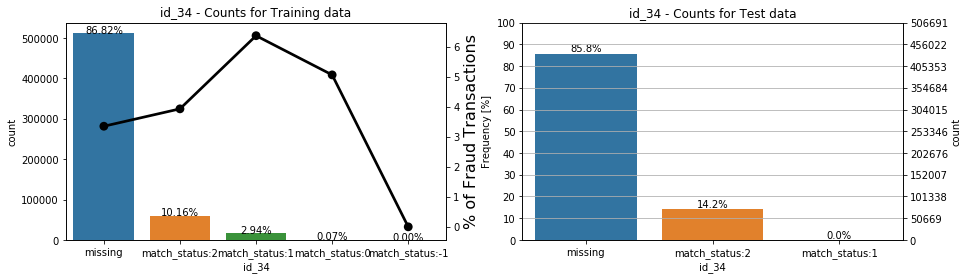

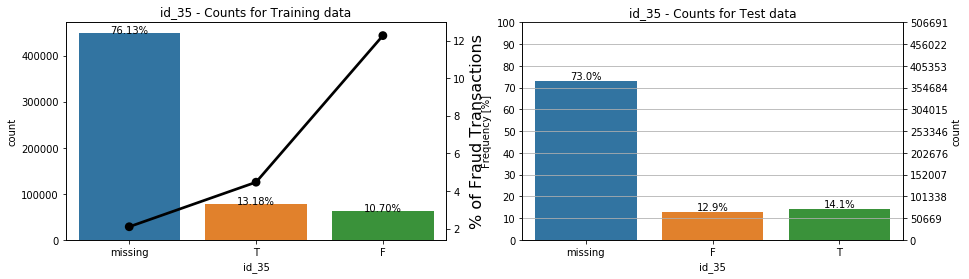

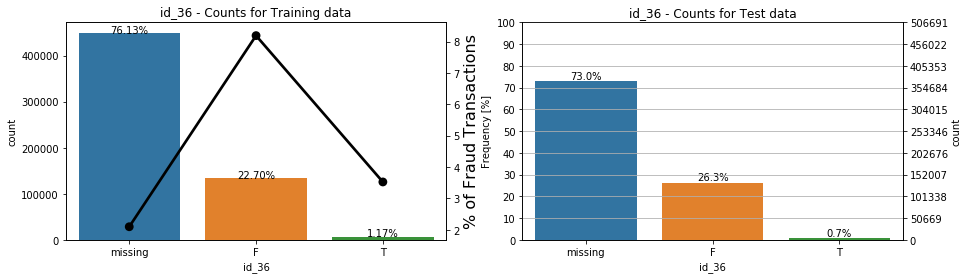

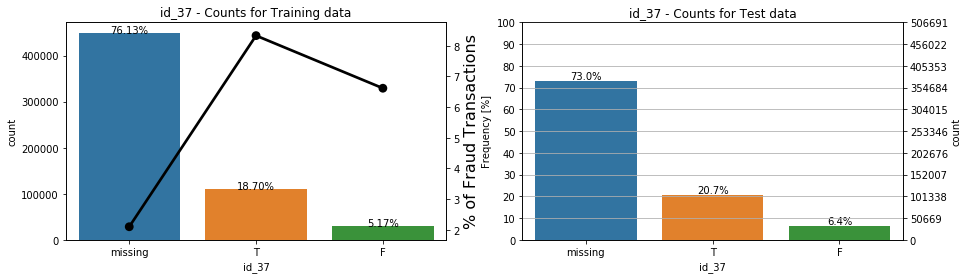

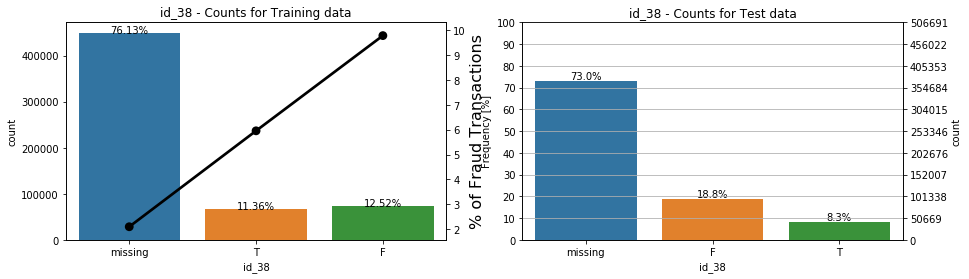

In [0]:
# @title Identity Features Analysis

for col in ['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_32', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38']:
  train_df[col].fillna(MISSING, inplace=True)
  test_df[col].fillna(MISSING, inplace=True)
  plt.figure(figsize=(15, 4))
  plt.subplot(1,2,1)
  ax = showCountForCatDataWithFraudPerc(train_df, col, col+' - Counts for Training data', list(train_df[col].unique()))
  plt.subplot(1,2,2)
  ax = showCountWithFreq(test_df, col, col+' - Counts for Test data', list(test_df[col].unique()))
  plt.show()
  plt.close()

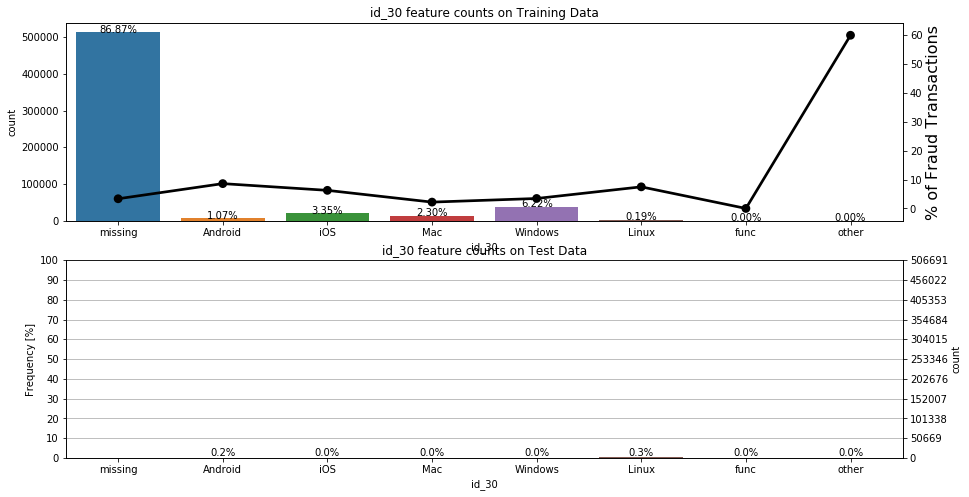

In [0]:
# @title Idenitiy Feature - Device OS - Analysis
# All the versions of the same OS categories are grouped together.
  # Here we are not taking advantage of the versions specified.
train_df.loc[train_df['id_30'].str.contains('Windows', na=False), 'id_30'] = 'Windows'
train_df.loc[train_df['id_30'].str.contains('iOS', na=False), 'id_30'] = 'iOS'
train_df.loc[train_df['id_30'].str.contains('Mac OS', na=False), 'id_30'] = 'Mac'
train_df.loc[train_df['id_30'].str.contains('Android', na=False), 'id_30'] = 'Android'
train_df['id_30'].fillna(MISSING, inplace=True)
col = 'id_30'
plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
ax = showCountForCatDataWithFraudPerc(train_df, col, col+' feature counts on Training Data',list(train_df[col].unique()))
plt.subplot(2,1,2)
ax = showCountWithFreq(test_df, col, col+' feature counts on Test Data', list(train_df[col].unique()))
plt.show()

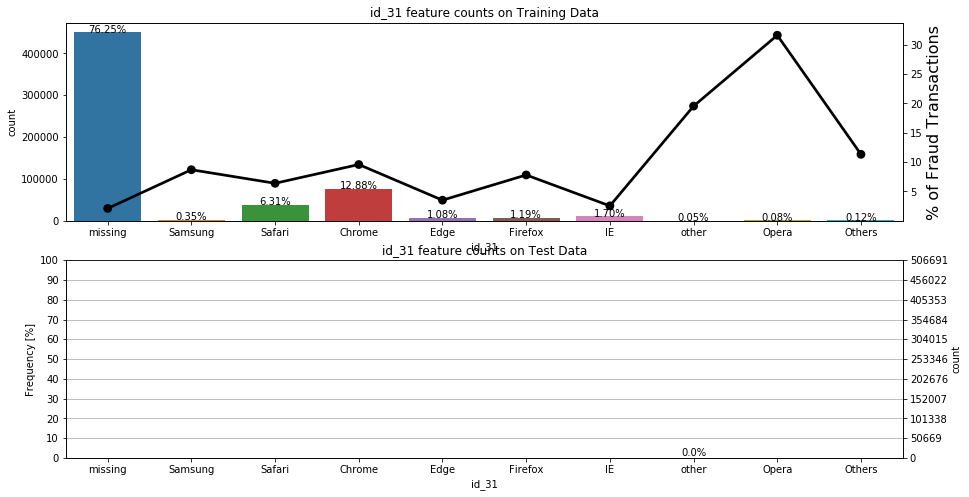

In [0]:
# @title Identity Feature - WEB Browser - Analysis

# All the versions of the same Web browser categories are grouped together.
  # Here we are not taking advantage of the versions specified.
train_df.loc[train_df['id_31'].str.contains('chrome', na=False), 'id_31'] = 'Chrome'
train_df.loc[train_df['id_31'].str.contains('firefox', na=False), 'id_31'] = 'Firefox'
train_df.loc[train_df['id_31'].str.contains('safari', na=False), 'id_31'] = 'Safari'
train_df.loc[train_df['id_31'].str.contains('edge', na=False), 'id_31'] = 'Edge'
train_df.loc[train_df['id_31'].str.contains('ie', na=False), 'id_31'] = 'IE'
train_df.loc[train_df['id_31'].str.contains('samsung', na=False), 'id_31'] = 'Samsung'
train_df.loc[train_df['id_31'].str.contains('opera', na=False), 'id_31'] = 'Opera'
train_df['id_31'].fillna(MISSING, inplace=True)
train_df.loc[train_df.id_31.isin(train_df.id_31.value_counts()[train_df.id_31.value_counts() < 200].index), 'id_31'] = "Others"
col = 'id_31'
plt.figure(figsize=(15, 8))
plt.subplot(2,1,1)
ax = showCountForCatDataWithFraudPerc(train_df, col, col+' feature counts on Training Data',list(train_df[col].unique()))
plt.subplot(2,1,2)
ax = showCountWithFreq(test_df, col, col+' feature counts on Test Data', list(train_df[col].unique()))
plt.show()

<strong>Observation</strong>
* Fraud Transaction percentage is more from opera browser.
* Chrome, Safari are the most used browsers for Transactions contributing to 20%.
* Windows OS contributes to 60% in Transaction Data.
* Fraud Transactions are more from other OS categories which contributes less than 1 % to the distribution.


#### Identity Numerical Features

In [0]:
numerical_columns = ['id_01', 'id_02', 'id_03', 'id_04', 
                     'id_05', 'id_06', 'id_07', 'id_08', 
                     'id_09', 'id_10', 'id_11']
display(resumetable(train_df[numerical_columns]))

,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,id_01,float64,446307,77,NaN,NaN,NaN,2.27
1,id_02,float64,449668,115655,NaN,NaN,NaN,16.72
2,id_03,float64,524216,24,NaN,NaN,NaN,0.32
3,id_04,float64,524216,15,NaN,NaN,NaN,0.10
4,id_05,float64,453675,93,NaN,NaN,NaN,2.40
5,id_06,float64,453675,101,NaN,NaN,NaN,2.63
6,id_07,float64,585385,84,NaN,NaN,NaN,5.39
7,id_08,float64,585385,94,NaN,NaN,NaN,5.72
8,id_09,float64,515614,46,NaN,NaN,NaN,0.51
9,id_10,float64,515614,62,NaN,NaN,NaN,0.30


-------------------------Distibution plots for Train Data-------------------------


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


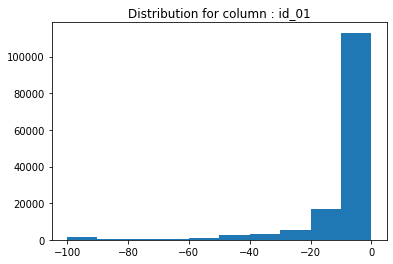

-------------------------Train data ValueCounts for feature id_02 for all Transactions-------------------------
NaN       0.761452
1102.0    0.000019
696.0     0.000017
1116.0    0.000015
1120.0    0.000015
Name: id_02, dtype: float64
-------------------------Train data ValueCounts for feature id_02 for Fraud Transactions
NaN         0.456904
525.0       0.000145
112425.0    0.000145
161164.0    0.000097
86737.0     0.000097
Name: id_02, dtype: float64
-------------------------Train data ValueCounts for feature id_03 for all Transactions-------------------------
NaN    0.887689
0.0    0.108211
1.0    0.001461
3.0    0.001131
2.0    0.000713
Name: id_03, dtype: float64
-------------------------Train data ValueCounts for feature id_03 for Fraud Transactions
NaN    0.655810
0.0    0.313991
1.0    0.007985
3.0    0.006098
2.0    0.005856
Name: id_03, dtype: float64
-------------------------Train data ValueCounts for feature id_04 for all Transactions-------------------------
 NaN    0.8876

In [0]:
def showValueCountsForCategorical(label = 'label', df=[]) :
  '''
  A simple function to show count plot for categorical variables.
  label : the categorical column on which coutplot to be shown.
  df : DataFrame
  '''
  g = sns.countplot(x=label, data=df)
  plt.show()

# id1-id11 :
numerical_columns = ['id_01', 'id_02', 'id_03', 'id_04', 
                     'id_05', 'id_06', 'id_07', 'id_08', 
                     'id_09', 'id_10', 'id_11']

print('-'*25 + "Distibution plots for Train Data" + '-'*25)
plt.hist(train_df[numerical_columns[0]])
plt.title(f'Distribution for column : {numerical_columns[0]}')
plt.show()

for col in numerical_columns[1:] :
  print('-'*25 + 'Train data ValueCounts for feature '+col+' for all Transactions' + '-'*25)
  print(train_df[col].value_counts(dropna=False, normalize=True).head())
  print('-'*25 + 'Train data ValueCounts for feature '+col+' for Fraud Transactions')
  print(train_df.loc[train_df['isFraud']==1][col].value_counts(dropna=False, normalize=True).head())

## Data Cleaning

In [0]:
# Remove columns if 90% of the feature is null or nan as those columns are not informative.
null_columns_train = [c for c in train_df.columns if (train_df[c].isnull().sum()/len(train_df)) >= 0.9]
null_columns_test = [c for c in test_df.columns if (test_df[c].isnull().sum()/len(test_df)) >= 0.9]

print('No. of Columns having null/nan values more than 90% in Train Data : ', str(len(null_columns_train)))
print('No. of Columns having null/nan values more than 90% in Test Data : ', str(len(null_columns_test)))
l = null_columns_train+null_columns_test
if 'isFraud' in l :
  l.remove('isFraud')
train_df.drop(set(l), axis=1, inplace=True)
test_df.drop(set(l), axis=1, inplace=True)

No. of Columns having null/nan values more than 90% in Train Data :  10
No. of Columns having null/nan values more than 90% in Test Data :  8


In [0]:
# Remove columns if 90% of the feature value is taken by one value count. That feature is not informative.
dominating_columns_train = [c for c in train_df.columns if (train_df[c].value_counts(dropna=False, normalize=True).values[0]) >= 0.9]
dominating_columns_test = [c for c in test_df.columns if (test_df[c].value_counts(dropna=False, normalize=True).values[0]) >= 0.9]

print('No. of Columns having one value more than 90% in Train Data : ', str(len(dominating_columns_train)))
print('No. of Columns having one value more than 90% in Test Data : ', str(len(dominating_columns_test)))
l = dominating_columns_train+dominating_columns_test
if 'isFraud' in l :
  l.remove('isFraud')
train_df.drop(set(l), axis=1, inplace=True)
test_df.drop(set(l), axis=1, inplace=True)

No. of Columns having one value more than 90% in Train Data :  57
No. of Columns having one value more than 90% in Test Data :  71


In [0]:
# Categorical columns all at once :
cat_feat = ['ProductCD', 'card1', 'card2', 
            'card3','card4', 'card5', 'card6', 
            'addr1', 'addr2', 'P_emaildomain',
            'R_emaildomain', 'M1', 'M2', 'M3','M4', 'M5', 
            'M6', 'M7', 'M8', 'M9', 'id_12', 'id_13', 
            'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 
            'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 
            'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 
            'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 
            'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 
            'DeviceType', 'DeviceInfo',]

# fill nan values in categorical features as missing as a category.
for cat in cat_feat :
  if cat in train_df:
    train_df[cat].fillna(MISSING, inplace=True)
    train_df[cat].apply(str)
  if cat in test_df:
    test_df[cat].fillna(MISSING, inplace=True)
    test_df[cat].apply(str)

In [0]:
# fill nan values in numerical features with median of the feature.
for cat in [col for col in train_df.columns if col not in cat_feat]:
  train_df[cat].fillna(train_df[cat].median(), inplace=True)

for cat in [col for col in test_df.columns if col not in cat_feat]:
  test_df[cat].fillna(test_df[cat].median(), inplace=True)

In [0]:
# For Categorical Data : Convert Categories to features
from sklearn.preprocessing import LabelEncoder
for col in cat_feat : 
  if col in train_df.columns :
    label_encoder = LabelEncoder()
    label_encoder.fit(list(train_df[col])+list(test_df[col]))
    train_df[col] = label_encoder.transform(list(train_df[col]))
    test_df[col] = label_encoder.transform(list(test_df[col])) 


## Train(90) : CV(10)

In [0]:
from sklearn.model_selection import train_test_split
# Dividing train data into train and cv with 80:10 ratio
y = train_df['isFraud']
train_df.drop(['isFraud', 'TransactionID'], axis=1, inplace=True)
train_df, cv_df, y_train, y_test = train_test_split(train_df, y, test_size=0.10, random_state=42, stratify=y)

In [0]:
print('Shape of Train Dataframe : ', train_df.shape)
print('Shape of CV Dataframe : ', cv_df.shape)

Shape of Train Dataframe :  (531486, 350)
Shape of CV Dataframe :  (59054, 350)


## Data Preprocessing

In [0]:
# Normalize the numerical features.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_columns = [col for col in train_df.columns if col not in cat_feat]
train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
cv_df[numerical_columns] = scaler.transform(cv_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

## Model

#### Utility

In [0]:
# loss functions
# model evaluation through confusion matrix, precision recall tables
# Normalize Numerical features
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.metrics import log_loss, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression


# Plot Roc Curve Method
def plotErrorPlot(K, meanTrainScores, meanTestScores) :
  '''
    Function to plot the scores of train and test data while hypertuning.
    Here the score is AUC values.
    Test scores are treated as Cross validation scores.
    K : hypertune variable.
    meanTrainScores : train scores.
    meanTestScores : test scores. 
  '''
  plt.plot(K, meanTrainScores, label='Train AUC')
  plt.plot(K, meanTestScores, label='CV AUC')
  plt.scatter(K, meanTrainScores, label='Train AUC')
  plt.scatter(K, meanTestScores, label='CV_AUC')
  plt.legend()
  plt.xlabel("K: hyperparameter")
  plt.ylabel("AUC")
  plt.title("AUC Score Plot")
  plt.show()

# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):

    '''
    Function to compute confusion matrix, precision, recall matrices
    and plot the values using heatmap.

    reference : www.appliedaicourse.com casestudies.
    
    test_y : actual y values
    predict_y : predicted y values 

    '''
    
    C = confusion_matrix(test_y, predict_y)

    A =(((C.T)/(C.sum(axis=1))).T)
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

#### Random Model

In [0]:
# Build a random model.
# we need to generate a random number in range (0, 1)
# ref: https://stackoverflow.com/a/18662466/4084039

train_data_len = train_df.shape[0]
train_predicted_y = np.zeros((train_data_len, 1))
for i in range(train_data_len) :
  rand_probs = np.random.rand(1,1)
  train_predicted_y[i] = rand_probs[0]
print(train_predicted_y.shape)
print("Log loss on Train Data using Random Model",log_loss(y_train,train_predicted_y, eps=1e-15))
print("ROCAUC score on Train Data using Random Model",roc_auc_score(y_train,train_predicted_y))

cv_data_len = cv_df.shape[0]
cv_predicted_y = np.zeros((cv_data_len, 1))
for i in range(cv_data_len) :
  rand_probs = np.random.rand(1,1)
  cv_predicted_y[i] = rand_probs[0]
print("Log loss on Cross Validation Data using Random Model",log_loss(y_test,cv_predicted_y, eps=1e-15))
print("ROCAUC score on Cross Validation Data using Random Model",roc_auc_score(y_test,cv_predicted_y))

(531486, 1)
Log loss on Train Data using Random Model 1.0008386154187585
ROCAUC score on Train Data using Random Model 0.5017818740770148
Log loss on Cross Validation Data using Random Model 1.0048460415526355
ROCAUC score on Cross Validation Data using Random Model 0.5024240000663172


#### Logistic Regression

##### Class weight unbalanced

In [0]:
alpha = [10 ** x for x in range(-5, 2)]
cv_log_error_array=[]
train_log_error_array=[]
cv_log_auc_array=[]
train_log_auc_array=[]
pred_label_col = 'pred_label'
true_label_col = 'true_label'

X_train = train_df
Y_train = y_train
X_cv = cv_df
Y_cv = y_test

for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i)
    logisticR.fit(X_train,Y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid", cv=2)
    sig_clf.fit(X_train, Y_train)
    
    predict_train_y = sig_clf.predict_proba(X_train)[:, 1]
    predict_cv_y = sig_clf.predict_proba(X_cv)[:, 1]
    
    # also do rocauc score
    train_auc = roc_auc_score(Y_train, predict_train_y)
    cv_auc = roc_auc_score(Y_cv, predict_cv_y)
    cv_log_auc_array.append(train_auc)
    train_log_auc_array.append(cv_auc)
    


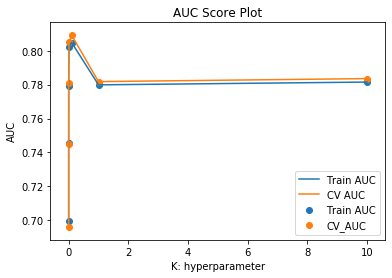

[0.6997857550690347, 0.7452509745262518, 0.7793882032602641, 0.8023349933693009, 0.8048449985326643, 0.7798687480341813, 0.7815102172288645]
best alpha :  0.1


In [0]:
plotErrorPlot(alpha, train_log_auc_array, cv_log_auc_array)
print(train_log_auc_array)
best_alpha = np.argmax(cv_log_auc_array)
print("best alpha : ", alpha[best_alpha])

-------------------------AUC Values-------------------------
Train Data :  0.7939499321501361
CV Data :  0.7915305754490118


-------------------------Confusion Matrix for Train Data-------------------------


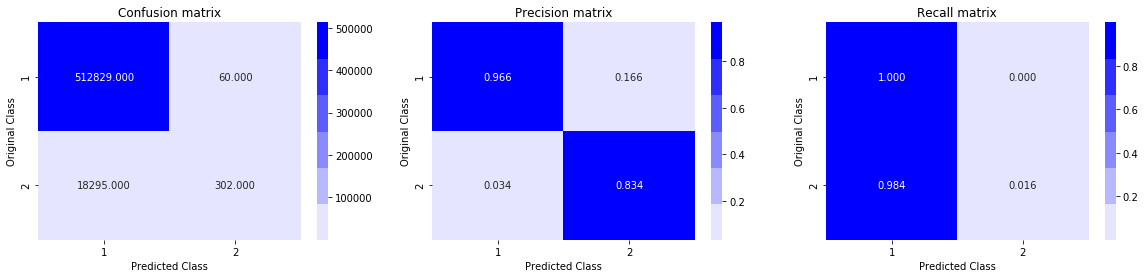

-------------------------Confusion Matrix for CV Data-------------------------


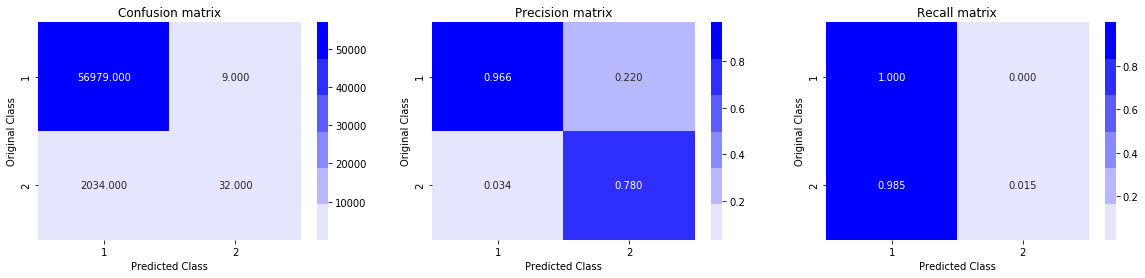

In [0]:
logisticR=LogisticRegression(penalty='l2',C=0.1)
logisticR.fit(X_train,Y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, Y_train)

# also do rocauc score
print('-'*25+'AUC Values'+'-'*25)
print('Train Data : ', roc_auc_score(Y_train, sig_clf.predict_proba(X_train)[:, 1]))
print('CV Data : ', roc_auc_score(Y_cv, sig_clf.predict_proba(X_cv)[:, 1]))
print('\n')

predict_train_y = sig_clf.predict(X_train)
predict_cv_y = sig_clf.predict(X_cv)
print('-'*25+'Confusion Matrix for Train Data'+'-'*25)
plot_confusion_matrix(Y_train, predict_train_y)
print('-'*25+'Confusion Matrix for CV Data'+'-'*25)
plot_confusion_matrix(Y_cv, predict_cv_y)

##### Class weight balanced

In [0]:
alpha = [10 ** x for x in range(-5, 2)]
cv_log_error_array=[]
train_log_error_array=[]
cv_log_auc_array=[]
train_log_auc_array=[]
pred_label_col = 'pred_label'
true_label_col = 'true_label'

X_train = train_df
Y_train = y_train
X_cv = cv_df
Y_cv = y_test

for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i, class_weight='balanced')
    logisticR.fit(X_train,Y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid", cv=2)
    sig_clf.fit(X_train, Y_train)
    
    predict_train_y = sig_clf.predict_proba(X_train)[:, 1]
    predict_cv_y = sig_clf.predict_proba(X_cv)[:, 1]
    
    # also do rocauc score
    train_auc = roc_auc_score(Y_train, predict_train_y)
    cv_auc = roc_auc_score(Y_cv, predict_cv_y)
    cv_log_auc_array.append(train_auc)
    train_log_auc_array.append(cv_auc)
    


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


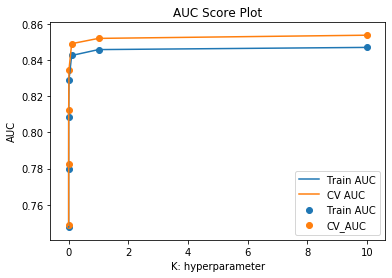

[0.7476443555549577, 0.7798926826938175, 0.8086470251613236, 0.8290590091112064, 0.8425698866580903, 0.8458363476735409, 0.8470491588351576]
best alpha :  10


In [0]:
plotErrorPlot(alpha, train_log_auc_array, cv_log_auc_array)
print(train_log_auc_array)
best_alpha = np.argmax(cv_log_auc_array)
print("best alpha : ", alpha[best_alpha])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


-------------------------AUC Values-------------------------
Train Data :  0.8550080449467702
CV Data :  0.8481002624081251


-------------------------Confusion Matrix for Train Data-------------------------


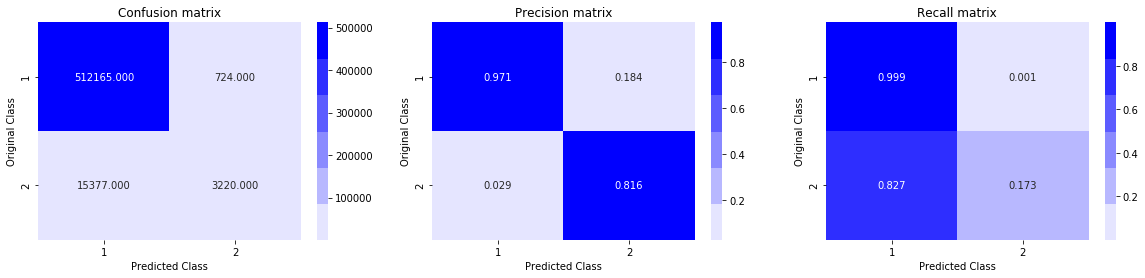

-------------------------Confusion Matrix for CV Data-------------------------


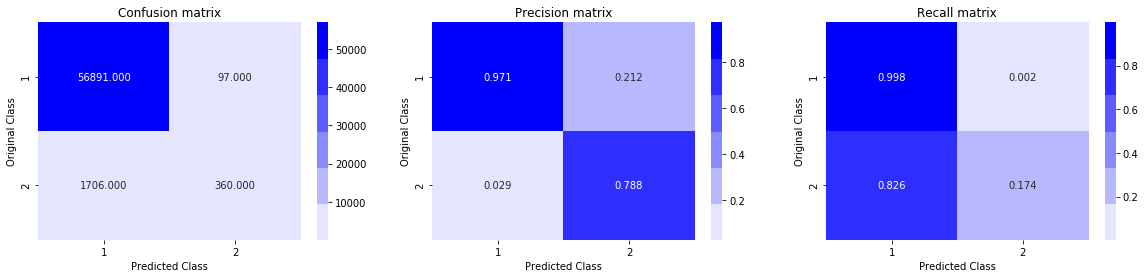

In [0]:
logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha], class_weight='balanced')
logisticR.fit(X_train,Y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, Y_train)

# also do rocauc score
print('-'*25+'AUC Values'+'-'*25)
print('Train Data : ', roc_auc_score(Y_train, sig_clf.predict_proba(X_train)[:, 1]))
print('CV Data : ', roc_auc_score(Y_cv, sig_clf.predict_proba(X_cv)[:, 1]))
print('\n')

predict_train_y = sig_clf.predict(X_train)
predict_cv_y = sig_clf.predict(X_cv)
print('-'*25+'Confusion Matrix for Train Data'+'-'*25)
plot_confusion_matrix(Y_train, predict_train_y)
print('-'*25+'Confusion Matrix for CV Data'+'-'*25)
plot_confusion_matrix(Y_cv, predict_cv_y)

#### SVM

In [0]:
from sklearn.linear_model import SGDClassifier

In [0]:
alpha = [10 ** x for x in range(-5, 2)]
cv_log_error_array=[]
train_log_error_array=[]
cv_log_auc_array=[]
train_log_auc_array=[]
pred_label_col = 'pred_label'
true_label_col = 'true_label'

X_train = train_df
Y_train = y_train
X_cv = cv_df
Y_cv = y_test


for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train,Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv=2)
    sig_clf.fit(X_train, Y_train)
    
    predict_train_y = sig_clf.predict_proba(X_train)[:, 1]
    predict_cv_y = sig_clf.predict_proba(X_cv)[:, 1]
    
    # also do rocauc score
    train_auc = roc_auc_score(Y_train, predict_train_y)
    cv_auc = roc_auc_score(Y_cv, predict_cv_y)
    cv_log_auc_array.append(train_auc)
    train_log_auc_array.append(cv_auc)

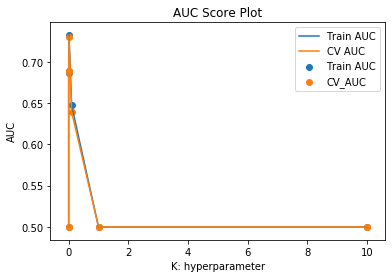

best alpha :  0.01


In [0]:
plotErrorPlot(alpha, train_log_auc_array, cv_log_auc_array)

best_alpha = np.argmax(cv_log_auc_array)
print("best alpha : ", alpha[best_alpha])

-------------------------AUC Values-------------------------
Train Data :  0.7303104389113462
CV Data :  0.7321516278864028


-------------------------Confusion Matrix for Train Data-------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


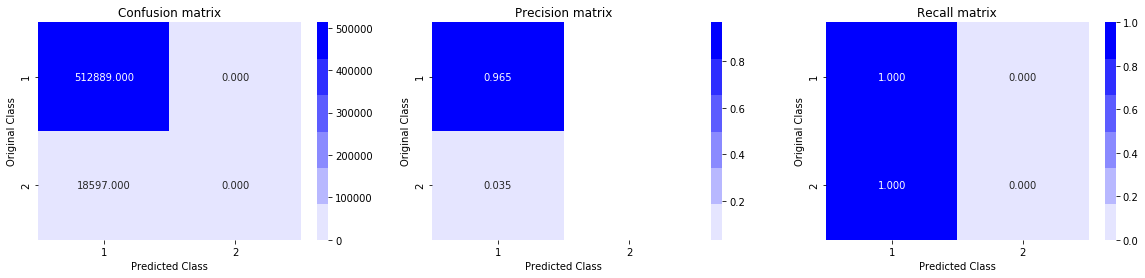

-------------------------Confusion Matrix for CV Data-------------------------


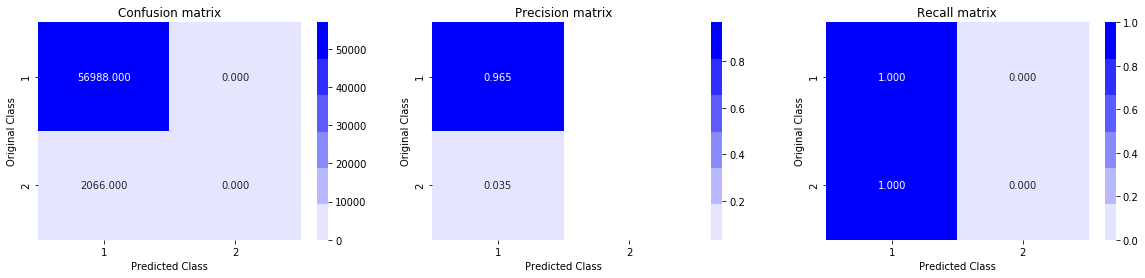

In [0]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train,Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv=2)
sig_clf.fit(X_train, Y_train)

# also do rocauc score
print('-'*25+'AUC Values'+'-'*25)
print('Train Data : ', roc_auc_score(Y_train, sig_clf.predict_proba(X_train)[:, 1]))
print('CV Data : ', roc_auc_score(Y_cv, sig_clf.predict_proba(X_cv)[:, 1]))
print('\n')
predict_train_y = sig_clf.predict(X_train)
predict_cv_y = sig_clf.predict(X_cv)
print('-'*25+'Confusion Matrix for Train Data'+'-'*25)
plot_confusion_matrix(Y_train, predict_train_y)
print('-'*25+'Confusion Matrix for CV Data'+'-'*25)
plot_confusion_matrix(Y_cv, predict_cv_y)

#### RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [0]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_auc_array=[]
train_log_auc_array=[]
X_train = train_df
Y_train = y_train
X_cv = cv_df
Y_cv = y_test
pred_label_col = 'pred_label'
true_label_col = 'true_label'

for i in alpha:
  for j in max_depth:
    print("for n_estimators =", i,"and max depth = ", j)
    clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
    clf.fit(X_train, Y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid", cv=2)
    sig_clf.fit(X_train, Y_train)
  
    predict_train_y = sig_clf.predict_proba(X_train)[:, 1]
    predict_cv_y = sig_clf.predict_proba(X_cv)[:, 1]
    
    # also do rocauc score
    train_auc = roc_auc_score(Y_train, predict_train_y)
    cv_auc = roc_auc_score(Y_cv, predict_cv_y)
    cv_log_auc_array.append(cv_auc)
    train_log_auc_array.append(train_auc)
    print ('Bias metric ',"for n_estimators =", i,"and max depth = ", j,' Overall AUC : ', ' train = ',train_auc, ' cv = ', cv_auc)

for n_estimators = 100 and max depth =  5
Bias metric  for n_estimators = 100 and max depth =  5  Overall AUC :   train =  0.8469497898434677  cv =  0.8373653807044584
for n_estimators = 100 and max depth =  10
Bias metric  for n_estimators = 100 and max depth =  10  Overall AUC :   train =  0.8752208942302176  cv =  0.8623375033659708
for n_estimators = 200 and max depth =  5
Bias metric  for n_estimators = 200 and max depth =  5  Overall AUC :   train =  0.8483303282584955  cv =  0.8380390419993653
for n_estimators = 200 and max depth =  10
Bias metric  for n_estimators = 200 and max depth =  10  Overall AUC :   train =  0.8758231090576941  cv =  0.8622524325530124
for n_estimators = 500 and max depth =  5
Bias metric  for n_estimators = 500 and max depth =  5  Overall AUC :   train =  0.8489401509705682  cv =  0.8388708096424369
for n_estimators = 500 and max depth =  10
Bias metric  for n_estimators = 500 and max depth =  10  Overall AUC :   train =  0.8761730298648894  cv =  0.862

-------------------------AUC Values-------------------------
Train Data :  0.8769103074863156
CV Data :  0.8638608748051848


-------------------------Confusion Matrix for Train Data-------------------------


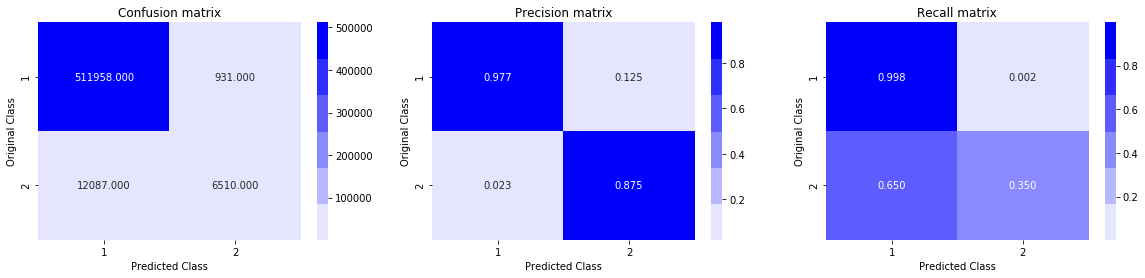

-------------------------Confusion Matrix for CV Data-------------------------


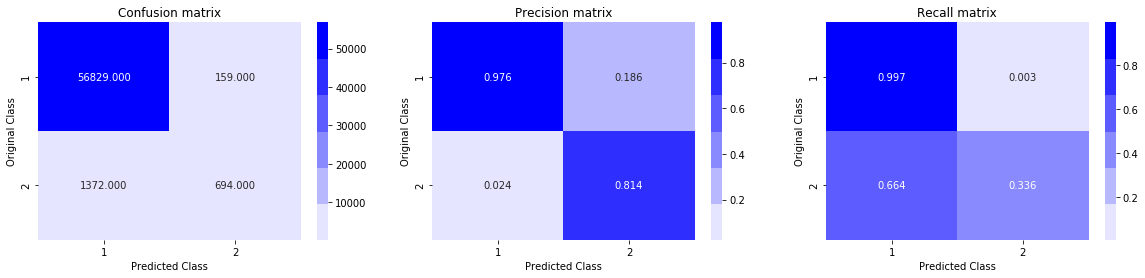

In [0]:

cv_log_auc_array=[]
train_log_auc_array=[]
X_train = train_df
Y_train = y_train
X_cv = cv_df
Y_cv = y_test
clf = RandomForestClassifier(n_estimators=2000, criterion='gini', max_depth=10, random_state=42, n_jobs=-1)
clf.fit(X_train, Y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, Y_train)

print('-'*25+'AUC Values'+'-'*25)
print('Train Data : ', roc_auc_score(Y_train, sig_clf.predict_proba(X_train)[:, 1]))
print('CV Data : ', roc_auc_score(Y_cv, sig_clf.predict_proba(X_cv)[:, 1]))
print('\n')

predict_train_y = sig_clf.predict(X_train)
predict_cv_y = sig_clf.predict(X_cv)
print('-'*25+'Confusion Matrix for Train Data'+'-'*25)
plot_confusion_matrix(Y_train, predict_train_y)
print('-'*25+'Confusion Matrix for CV Data'+'-'*25)
plot_confusion_matrix(Y_cv, predict_cv_y)

#### XGBoost

hyperparameter : depth -  3  estimator -  500  auc score : train -  0.922  cv-  0.909
hyperparameter : depth -  3  estimator -  700  auc score : train -  0.929  cv-  0.916
hyperparameter : depth -  3  estimator -  1100  auc score : train -  0.94  cv-  0.925
hyperparameter : depth -  3  estimator -  1500  auc score : train -  0.947  cv-  0.931
hyperparameter : depth -  5  estimator -  500  auc score : train -  0.958  cv-  0.94
hyperparameter : depth -  5  estimator -  700  auc score : train -  0.966  cv-  0.948
hyperparameter : depth -  5  estimator -  1100  auc score : train -  0.978  cv-  0.956
hyperparameter : depth -  5  estimator -  1500  auc score : train -  0.984  cv-  0.961
-------------------- AUC Score for train data --------------------


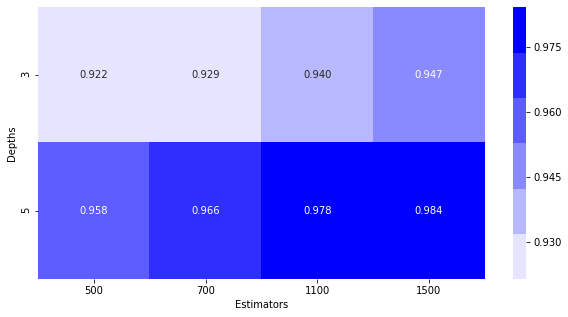

------------------------------ AUC Score for CV data ------------------------------


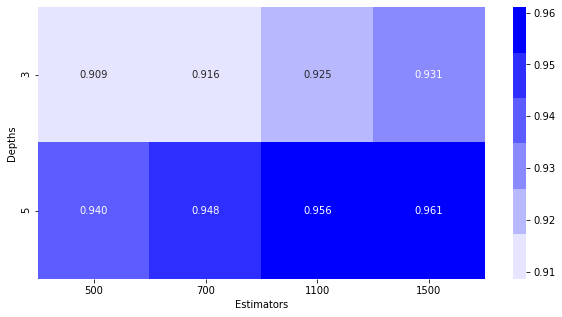

16077.957538617


In [0]:
from timeit import default_timer as timer
import xgboost as xgb

X_train = train_df
Y_train = y_train
X_cv = cv_df
Y_cv = y_test
pred_cv = []
pred_train = []
depths=[3, 5]
estimators=[500, 700, 1100, 1500]


start = timer()
for i in depths:
  for j in estimators:
    clf = xgb.XGBClassifier(nthread=-1,n_estimators = j, max_depth = i)
    clf.fit(X_train, Y_train)
    probs = clf.predict_proba(X_cv)
    probs = probs[:,1]
    prob = clf.predict_proba(X_train)
    prob = prob[:,1]
    auc_score_cv = roc_auc_score(Y_cv,probs)
    auc_score_train = roc_auc_score(Y_train,prob)
    pred_cv.append(auc_score_cv)
    pred_train.append(auc_score_train)
    print('hyperparameter : depth - ', str(i), ' estimator - ',str(j), ' auc score : train - ', str(round(auc_score_train, 3)), ' cv- ', str(round(auc_score_cv, 3)))

cmap=sns.light_palette("blue")
# representing heat map for auc score
print("-"*20, "AUC Score for train data", "-"*20)
pred_train = np.array(pred_train)
pred_train = pred_train.reshape(len(depths),len(estimators))
plt.figure(figsize=(10,5))
sns.heatmap(pred_train,annot=True, cmap=cmap, fmt=".3f", xticklabels=estimators,yticklabels=depths)
plt.xlabel('Estimators')
plt.ylabel('Depths')
plt.show()
print("-"*30, "AUC Score for CV data", "-"*30)
pred_cv = np.array(pred_cv)
pred_cv = pred_cv.reshape(len(depths),len(estimators))
plt.figure(figsize=(10,5))
sns.heatmap(pred_cv, annot=True, cmap=cmap, fmt=".3f", xticklabels=estimators, yticklabels=depths)
plt.xlabel('Estimators')
plt.ylabel('Depths')
plt.show()
end = timer()
print(end - start)

-------------------------AUC Values-------------------------
Train Data :  0.9215588638037375
CV Data :  0.9086209560872209


-------------------------Confusion Matrix for Train Data-------------------------


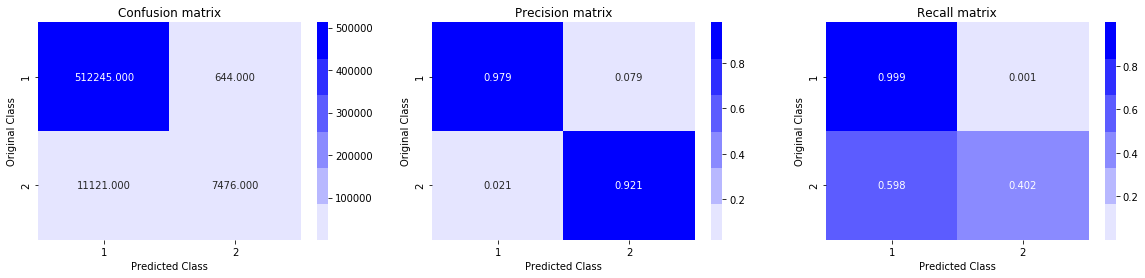

-------------------------Confusion Matrix for CV Data-------------------------


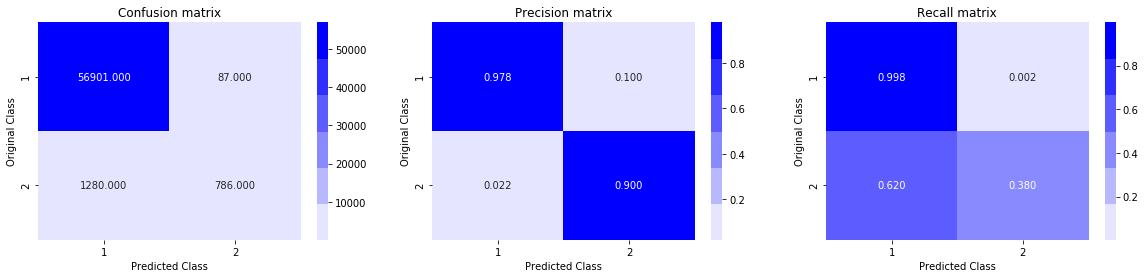

In [0]:
import xgboost as xgb
X_train = train_df
Y_train = y_train
X_cv = cv_df
Y_cv = y_test
pred_cv = []
pred_train = []

clf = xgb.XGBClassifier(nthread=-1, n_estimators = 500, max_depth = 3)
clf.fit(X_train, Y_train)
# also do rocauc score
print('-'*25+'AUC Values'+'-'*25)
print('Train Data : ', roc_auc_score(Y_train, clf.predict_proba(X_train)[:, 1]))
print('CV Data : ', roc_auc_score(Y_cv, clf.predict_proba(X_cv)[:, 1]))
print('\n')

predict_train_y = clf.predict(X_train)
predict_cv_y = clf.predict(X_cv)
print('-'*25+'Confusion Matrix for Train Data'+'-'*25)
plot_confusion_matrix(Y_train, predict_train_y)
print('-'*25+'Confusion Matrix for CV Data'+'-'*25)
plot_confusion_matrix(Y_cv, predict_cv_y)

-------------------------AUC Values-------------------------
Train Data :  0.9374922822741487
CV Data :  0.9233630374520178


-------------------------Confusion Matrix for Train Data-------------------------


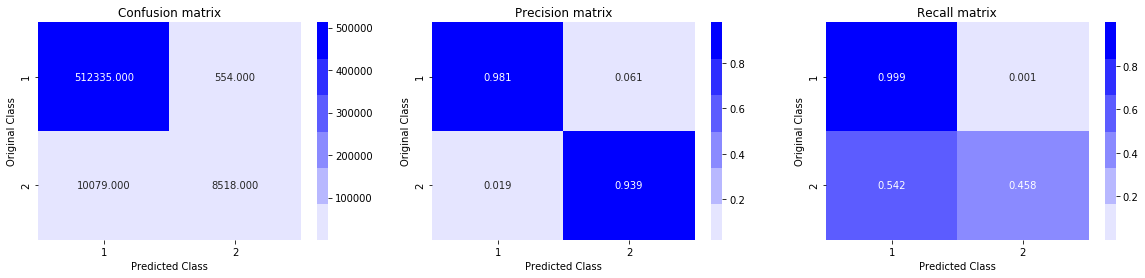

-------------------------Confusion Matrix for CV Data-------------------------


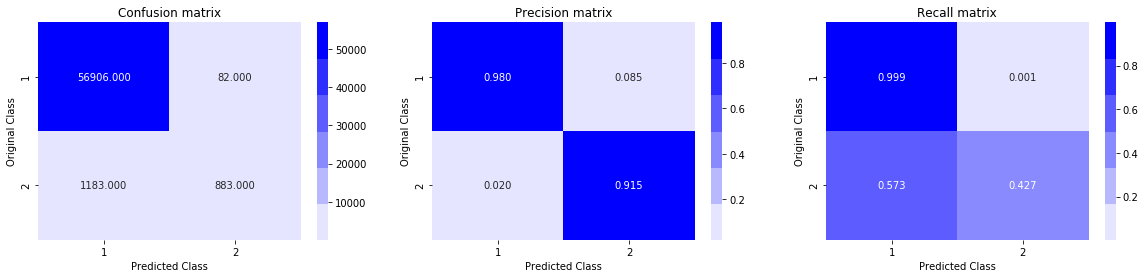

In [0]:
import xgboost as xgb
X_train = train_df
Y_train = y_train
X_cv = cv_df
Y_cv = y_test
pred_cv = []
pred_train = []

clf = xgb.XGBClassifier(nthread=-1, n_estimators = 1000, max_depth = 3)
clf.fit(X_train, Y_train)
# also do rocauc score
print('-'*25+'AUC Values'+'-'*25)
print('Train Data : ', roc_auc_score(Y_train, clf.predict_proba(X_train)[:, 1]))
print('CV Data : ', roc_auc_score(Y_cv, clf.predict_proba(X_cv)[:, 1]))
print('\n')

predict_train_y = clf.predict(X_train)
predict_cv_y = clf.predict(X_cv)
print('-'*25+'Confusion Matrix for Train Data'+'-'*25)
plot_confusion_matrix(Y_train, predict_train_y)
print('-'*25+'Confusion Matrix for CV Data'+'-'*25)
plot_confusion_matrix(Y_cv, predict_cv_y)

In [0]:
feat_imp = clf.get_score(importance_type='gain')
print(feat_imp)

#### LGBM Model 

In [0]:
import lightgbm as lgb
# https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
d_train = lgb.Dataset(train_df, label=y_train)

params = {}
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'auc'
params['sub_feature'] = 0.5
params['min_data'] = 50
params['max_depth'] = 10

clf = lgb.train(params, d_train, 100)

#Prediction
y_pred_proba_train=clf.predict(train_df)
y_pred_proba_cv=clf.predict(cv_df)


In [0]:
print('-'*25+'AUC Values'+'-'*25)
print('Train Data : ', roc_auc_score(Y_train, y_pred_proba_train))
print('CV Data : ', roc_auc_score(Y_cv, y_pred_proba_cv))
print('\n')

-------------------------AUC Values-------------------------
Train Data :  0.9346443483029383
CV Data :  0.919963644797828




-------------------------Confusion Matrix for Train Data-------------------------


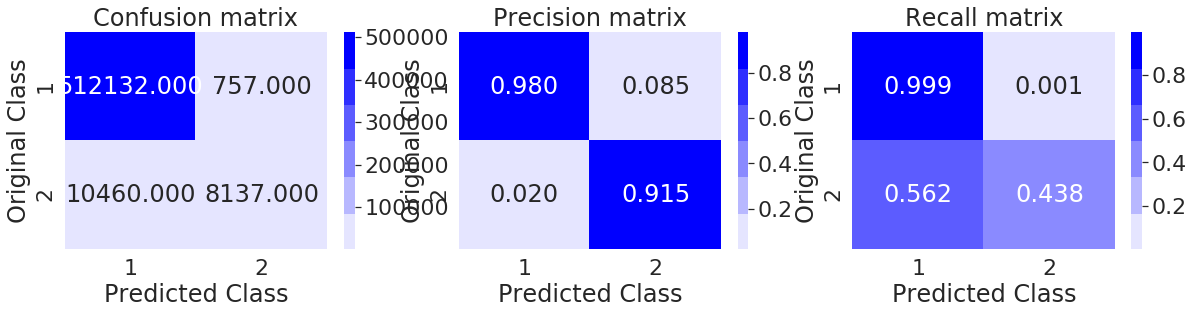

-------------------------Confusion Matrix for CV Data-------------------------


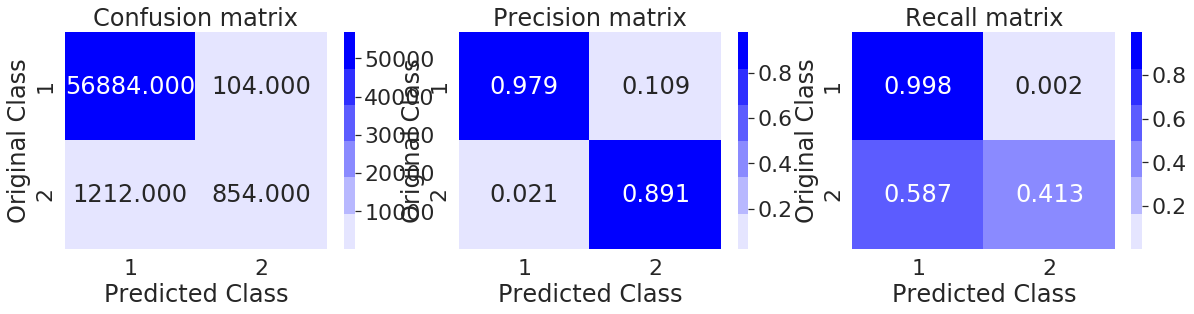

In [0]:
y_pred_train = []
y_pred_cv=[]
for i in y_pred_proba_train:
  if i > 0.5:
    y_pred_train.append(1)
  else :
    y_pred_train.append(0)

for j in y_pred_proba_cv:
  if j > 0.5:
    y_pred_cv.append(1)
  else :
    y_pred_cv.append(0)
print('-'*25+'Confusion Matrix for Train Data'+'-'*25)
plot_confusion_matrix(Y_train, y_pred_train)
print('-'*25+'Confusion Matrix for CV Data'+'-'*25)
plot_confusion_matrix(Y_cv, y_pred_cv)

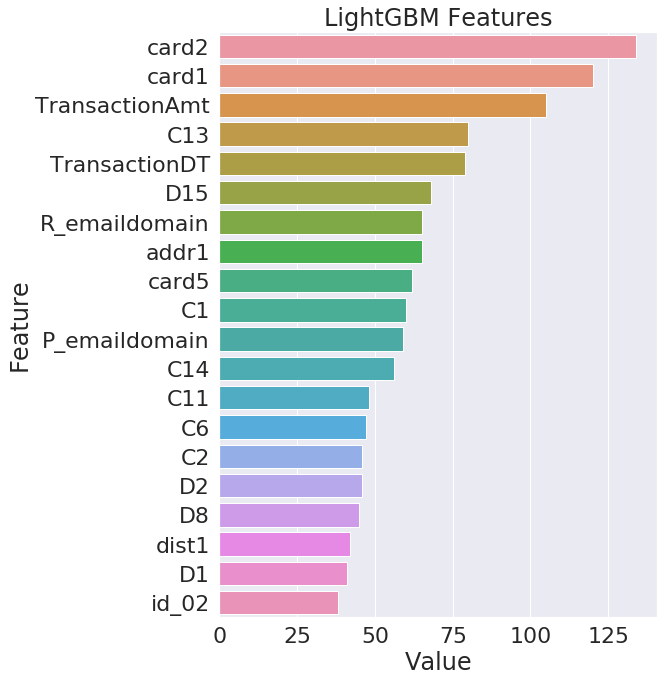

In [0]:
def plotImp(model, X , num = 20):
    '''
    Function to plot the top num {20 default} important features for Model LGBM.
    # reference : https://stackoverflow.com/questions/53413701/feature-importance-using-lightgbm
    '''
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale = 2)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features')
    plt.tight_layout()
    plt.show()

plotImp(clf, train_df)

## Conclusions :
> * Data Consists of Categorical columns and Numerical Columns. 
> * Data is unbalanced - only 3.5 % of data is fraud.
> * Train and Test Data is distributed on Time.
> * Performed Exploratory Data Analysis on Train and Test Data. Train data is not orthogonal to Classify using linear algorithms.
> * For Model evaluation - Data is divided into Train(90%) and CV(10%) stratified on Fraud column.
> * Tree based algorithms RandomForest(auc-84%), XGBoost (auc - 93%), LGBM (auc-93%) gave better performance than linear classification algorithms Logistic Regression (79%), LinearSVM (73%).
> * The most important features found are card features.


In [0]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ["Model", "Hyperparameter", "Train AUC", "CV AUC"]
x.add_row(['Linear Regression', '10', '0.855', '0.848'])
x.add_row(['Linear SVM', '0.01', '0.730', '0.732'])
x.add_row(['Random Forest', 'estimators: 2000, depth: 10', '0.876', '0.863'])
x.add_row(['XGBOOST', 'estimators: 1000, depth: 3', '0.93', '0.92'])
x.add_row(['LightGBM', 'depth: 10, alg: gbdt', '0.934', '0.92'])
print(x)

## References : 
* EDA : https://www.kaggle.com/artgor/eda-and-models , https://www.kaggle.com/kabure/extensive-eda-and-modeling-xgb-hyperopt
* LGBM Model : # https://medium.com/@pushkarmandot/https-medium-com-pushkarmandot-what-is-lightgbm-how-to-implement-it-how-to-fine-tune-the-parameters-60347819b7fc
